# Applying Machine Learning to Ames housing data to predict sale prices
## Shameer Sukha - Jan 2020

This notebook applies machine learning techniques to the Ames housing data to predict **sales prices** from various other variables related to a house. It is in response to the NYDSA - Machine Learning project.

It conducts a walk-through of the data science lifecycle for machine learning comprising of data cleaning, imputation, analysis, wrangling, visualisation and finally modelling.

## Import necessary packages 

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import statsmodels.api as sm
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import mutual_info_regression
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import ensemble

## Print information about data for reference

In [2]:
filename = '.\data\data_description.txt'
with open(filename) as f:
    for line in f:
        print(line)

MSSubClass: Identifies the type of dwelling involved in the sale.	



        20	1-STORY 1946 & NEWER ALL STYLES

        30	1-STORY 1945 & OLDER

        40	1-STORY W/FINISHED ATTIC ALL AGES

        45	1-1/2 STORY - UNFINISHED ALL AGES

        50	1-1/2 STORY FINISHED ALL AGES

        60	2-STORY 1946 & NEWER

        70	2-STORY 1945 & OLDER

        75	2-1/2 STORY ALL AGES

        80	SPLIT OR MULTI-LEVEL

        85	SPLIT FOYER

        90	DUPLEX - ALL STYLES AND AGES

       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER

       150	1-1/2 STORY PUD - ALL AGES

       160	2-STORY PUD - 1946 & NEWER

       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER

       190	2 FAMILY CONVERSION - ALL STYLES AND AGES



MSZoning: Identifies the general zoning classification of the sale.

		

       A	Agriculture

       C	Commercial

       FV	Floating Village Residential

       I	Industrial

       RH	Residential High Density

       RL	Residential Low Density

       RP	Residential 

## Load Data
1. Use downloaded train data from Kaggle, test data is not useful since it does not contain SalePrice because of competition
2. Use 70/30 split to hold-out 30% of training data but only after all data cleaning and pre-processing completed.


In [3]:
# Read .csv files
housing = pd.read_csv('./data/train.csv')
housing.shape

(1460, 81)

## Data Exploration
1. Create useful initial summary of variables, which will help with **missingness** and **feature selection**
2. Create charts and stats to summarise SalePrice target variable
3. Create charts and stats to summarise SalePrice with features expected to be important
3. Create charts and stats to understand relationships amongst all variables with themselves and avoid multicollinearity

In [4]:
housing.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

In [5]:
# Year is an ordinal variable because inflation and age affects values so leave as numeric type. 
# However month is categorical not numerical - MoSold
# In addition MSSubClass is categorical but stored as numerical
# Convert these two variables as strings
housing['MSSubClass'] = housing['MSSubClass'].apply(str)
housing['MoSold'] = housing['MoSold'].astype(str)

In [6]:
def bespoke_pcorr(df, response, varname):
    """
    Takes a dataframe df of numerical variables and returns a dataframe of the 
    correlation of response variable with other variables in df and labels the 
    column varname.
    """
    response_corr = pd.DataFrame(df.corr(method='spearman')[response]).reset_index()
    response_corr.columns = [varname, 'SpearmanCorr']
    return response_corr


def bespoke_outliers(df, factor, varname):
    """
    Takes a dataframe df of numerical variables and returns a dataframe of the 
    number of outliers past factor multiple of the inter-quartile range according to the Tukey method.
    """
    # Define helper function to count outliers in a given column col past a factor multiple of the
    # inter-quartile range
    def count_outliers(col, factor):
        try:
            #1st quartile (25%)
            Q1 = np.percentile(col, 25)
            # 3rd quartile (75%)
            Q3 = np.percentile(col, 75)
            # Interquartile range (IQR)
            IQR = Q3 - Q1
        
            # outlier step
            outlier_step = factor * IQR
        
            # Determine a list of indices of outliers for feature col
            numout = col[(col < Q1 - outlier_step) | (col > Q3 + outlier_step)].shape[0]
            return numout
        except:
            return 0

    outliers = pd.DataFrame(df.apply(lambda x: count_outliers(x, factor), axis=0)).reset_index()
    outliers.columns = [varname, 'NumOutliers']
    
    return outliers   


# Define own function to summarise data
def summarise_data(df, response):
    """
    Takes a dataframe df of numerical of numerical and categorical variables and creates a bespoke
    summary that is helpful for regression/predictive tasks. The target variable is identified with 
    response input and the rest are assumed to be features.
    
    Output shows columns as follows:
    1. Predictor variable name
    2. Count of values in feature 
    3. Count of missing values
    4. Total length of column
    5. Percentage missing in each feature
    6. Type of feature: numerical or categorical
    7. If categorical variable, then number of catgories
    8. If numerical variable, the skewness (0 being no skew of Normal dist)
    9. If numerical variable, Spearman correlation with target variable identified in response
    10. If numerical variable, Number of outliers based on Tukey's method of factor (1.5) times inter-quartile range
    """
    tempdf = pd.DataFrame(df.count()).reset_index()
    tempdf.columns = ['Predictor', 'ValueCount']
    tempdf['MissingCount'] = tempdf['Predictor'].apply(lambda x: df[x].isnull().sum())
    tempdf['TotalCount'] = tempdf['ValueCount'] + tempdf['MissingCount']
    tempdf['MissingPercent'] = tempdf['MissingCount'] / len(df)
    tempdf['VariableType'] = tempdf['Predictor'].apply(lambda x: 'categorical' if df[x].dtype=='object' else 'numerical')
    tempdf['CountCategories'] = [len(df[col].value_counts()) if df[col].dtype == 'object' else 0 for col in 
                          tempdf['Predictor'].values]
    tempdf['Skewness'] = [stats.skew(df[col]) if df[col].dtype != 'object' else 0 for col in 
                          tempdf['Predictor'].values]
    tempdf = tempdf.merge(bespoke_pcorr(df, response, 'Predictor'), how='left', on='Predictor')
    tempdf = tempdf.merge(bespoke_outliers(df, 1.5, 'Predictor'), how='left', on='Predictor')
    tempdf.reset_index(drop=True, inplace=True)
        
    return tempdf


In [7]:
# Variables with missing values ranked by percentage missing
summarydf = summarise_data(housing, 'SalePrice')
mask = summarydf.MissingPercent > 0
missing_vars = list(summarydf.loc[mask, 'Predictor'])
summarydf.loc[mask, :].sort_values('MissingPercent', ascending=False)

Predictor  ValueCount  MissingCount  TotalCount  MissingPercent  \
72        PoolQC           7          1453        1460        0.995205   
74   MiscFeature          54          1406        1460        0.963014   
6          Alley          91          1369        1460        0.937671   
73         Fence         281          1179        1460        0.807534   
57   FireplaceQu         770           690        1460        0.472603   
3    LotFrontage        1201           259        1460        0.177397   
58    GarageType        1379            81        1460        0.055479   
59   GarageYrBlt        1379            81        1460        0.055479   
60  GarageFinish        1379            81        1460        0.055479   
63    GarageQual        1379            81        1460        0.055479   
64    GarageCond        1379            81        1460        0.055479   
32  BsmtExposure        1422            38        1460        0.026027   
35  BsmtFinType2        1422            38        1460        0.026027   
33  BsmtFinType1        1423            37        1460        0.025342   
31      BsmtCond        1423            37        1460        0.025342   
30      BsmtQual        1423            37        1460        0.025342   
26    MasVnrArea        1452             8        1460        0.005479   
25    MasVnrType        1452             8        1460        0.005479   
42    Electrical        1459             1        1460        0.000685   

   VariableType  CountCategories  Skewness  SpearmanCorr  NumOutliers  
72  categorical                3       0.0           NaN            0  
74  categorical                4       0.0           NaN            0  
6   categorical                2       0.0           NaN            0  
73  categorical                4       0.0           NaN            0  
57  categorical                5       0.0           NaN            0  
3     numerical                0       NaN      0.409076           30  
58  categorical                6       0.0           NaN            0  
59    numerical                0       NaN      0.593788            0  
60  categorical                3       0.0           NaN            0  
63  categorical                5       0.0           NaN            0  
64  categorical                5       0.0           NaN            0  
32  categorical                4       0.0           NaN            0  
35  categorical                6       0.0           NaN            0  
33  categorical                6       0.0           NaN            0  
31  categorical                4       0.0           NaN            0  
30  categorical                4       0.0           NaN            0  
26    numerical                0       NaN      0.421309           96  
25  categorical                4       0.0           NaN            0  
42  categorical                5       0.0           NaN            0

In [8]:
summarydf

Predictor  ValueCount  MissingCount  TotalCount  MissingPercent  \
0              Id        1460             0        1460        0.000000   
1      MSSubClass        1460             0        1460        0.000000   
2        MSZoning        1460             0        1460        0.000000   
3     LotFrontage        1201           259        1460        0.177397   
4         LotArea        1460             0        1460        0.000000   
..            ...         ...           ...         ...             ...   
76         MoSold        1460             0        1460        0.000000   
77         YrSold        1460             0        1460        0.000000   
78       SaleType        1460             0        1460        0.000000   
79  SaleCondition        1460             0        1460        0.000000   
80      SalePrice        1460             0        1460        0.000000   

   VariableType  CountCategories   Skewness  SpearmanCorr  NumOutliers  
0     numerical                0   0.000000     -0.018546            0  
1   categorical               15   0.000000           NaN            0  
2   categorical                5   0.000000           NaN            0  
3     numerical                0        NaN      0.409076           30  
4     numerical                0  12.195142      0.456461           69  
..          ...              ...        ...           ...          ...  
76  categorical               12   0.000000           NaN            0  
77    numerical                0   0.096170     -0.029899            0  
78  categorical                9   0.000000           NaN            0  
79  categorical                6   0.000000           NaN            0  
80    numerical                0   1.880941      1.000000           61  

[81 rows x 10 columns]

In [9]:
# Store lists of names of numerical and categorical features
mask = summarydf.VariableType == 'categorical'
categorical_vars = list(summarydf.loc[mask, 'Predictor'])
print('The number of categorical variables are: %.0i' %len(categorical_vars))
mask = summarydf.VariableType == 'numerical'
numerical_vars = list(summarydf.loc[mask, 'Predictor'])
print('The number of numerical variables are: %.0i' %len(numerical_vars))

The number of categorical variables are: 45
The number of numerical variables are: 36


In [10]:
# Variables with skewness greater than 0.6, ranked by skewness
mask = (np.abs(summarydf.Skewness) > 0.6) & (summarydf.VariableType == 'numerical')
skew_vars = list(summarydf.loc[mask, 'Predictor'])
summarydf.loc[mask, :].sort_values('Skewness', ascending=False)

Predictor  ValueCount  MissingCount  TotalCount  MissingPercent  \
75        MiscVal        1460             0        1460             0.0   
71       PoolArea        1460             0        1460             0.0   
4         LotArea        1460             0        1460             0.0   
69      3SsnPorch        1460             0        1460             0.0   
45   LowQualFinSF        1460             0        1460             0.0   
52   KitchenAbvGr        1460             0        1460             0.0   
36     BsmtFinSF2        1460             0        1460             0.0   
70    ScreenPorch        1460             0        1460             0.0   
48   BsmtHalfBath        1460             0        1460             0.0   
68  EnclosedPorch        1460             0        1460             0.0   
67    OpenPorchSF        1460             0        1460             0.0   
80      SalePrice        1460             0        1460             0.0   
34     BsmtFinSF1        1460             0        1460             0.0   
66     WoodDeckSF        1460             0        1460             0.0   
38    TotalBsmtSF        1460             0        1460             0.0   
43       1stFlrSF        1460             0        1460             0.0   
46      GrLivArea        1460             0        1460             0.0   
37      BsmtUnfSF        1460             0        1460             0.0   
44       2ndFlrSF        1460             0        1460             0.0   
18    OverallCond        1460             0        1460             0.0   
54   TotRmsAbvGrd        1460             0        1460             0.0   
50       HalfBath        1460             0        1460             0.0   
56     Fireplaces        1460             0        1460             0.0   
19      YearBuilt        1460             0        1460             0.0   

   VariableType  CountCategories   Skewness  SpearmanCorr  NumOutliers  
75    numerical                0  24.451640     -0.062727           52  
71    numerical                0  14.813135      0.058453            7  
4     numerical                0  12.195142      0.456461           69  
69    numerical                0  10.293752      0.065440           24  
45    numerical                0   9.002080     -0.067719           26  
52    numerical                0   4.483784     -0.164826           68  
36    numerical                0   4.250888     -0.038806          167  
70    numerical                0   4.117977      0.100070          116  
48    numerical                0   4.099186     -0.012189           82  
68    numerical                0   3.086696     -0.218394          208  
67    numerical                0   2.361912      0.477561           77  
80    numerical                0   1.880941      1.000000           61  
34    numerical                0   1.683771      0.301871            7  
66    numerical                0   1.539792      0.353802           32  
38    numerical                0   1.522688      0.602725           61  
43    numerical                0   1.375342      0.575408           20  
46    numerical                0   1.365156      0.731310           31  
37    numerical                0   0.919323      0.185197           29  
44    numerical                0   0.812194      0.293598            2  
18    numerical                0   0.692355     -0.129325          125  
54    numerical                0   0.675646      0.532586           30  
50    numerical                0   0.675203      0.343008            0  
56    numerical                0   0.648898      0.519247            5  
19    numerical                0  -0.612831      0.652682            7

In [11]:
# Variables that are highly correlated with SalePrice for initial indication of useful features
mask = (np.abs(summarydf.SpearmanCorr) > 0.5) & (summarydf.VariableType == 'numerical')
salescorr_vars = list(summarydf.loc[mask, 'Predictor'])
summarydf.loc[mask, :].sort_values('SpearmanCorr', ascending=False)

Predictor  ValueCount  MissingCount  TotalCount  MissingPercent  \
80     SalePrice        1460             0        1460        0.000000   
17   OverallQual        1460             0        1460        0.000000   
46     GrLivArea        1460             0        1460        0.000000   
61    GarageCars        1460             0        1460        0.000000   
19     YearBuilt        1460             0        1460        0.000000   
62    GarageArea        1460             0        1460        0.000000   
49      FullBath        1460             0        1460        0.000000   
38   TotalBsmtSF        1460             0        1460        0.000000   
59   GarageYrBlt        1379            81        1460        0.055479   
43      1stFlrSF        1460             0        1460        0.000000   
20  YearRemodAdd        1460             0        1460        0.000000   
54  TotRmsAbvGrd        1460             0        1460        0.000000   
56    Fireplaces        1460             0        1460        0.000000   

   VariableType  CountCategories  Skewness  SpearmanCorr  NumOutliers  
80    numerical                0  1.880941      1.000000           61  
17    numerical                0  0.216721      0.809829            2  
46    numerical                0  1.365156      0.731310           31  
61    numerical                0 -0.342197      0.690711            5  
19    numerical                0 -0.612831      0.652682            7  
62    numerical                0  0.179796      0.649379           21  
49    numerical                0  0.036524      0.635957            0  
38    numerical                0  1.522688      0.602725           61  
59    numerical                0       NaN      0.593788            0  
43    numerical                0  1.375342      0.575408           20  
20    numerical                0 -0.503044      0.571159            0  
54    numerical                0  0.675646      0.532586           30  
56    numerical                0  0.648898      0.519247            5

In [12]:
# Variables with large number of outliers ranked by count of possible outliers
mask = (np.abs(summarydf.NumOutliers) !=0) & (summarydf.VariableType == 'numerical')
outlier_vars = list(summarydf.loc[mask, 'Predictor'])
summarydf.loc[mask, :].sort_values('NumOutliers', ascending=False)

Predictor  ValueCount  MissingCount  TotalCount  MissingPercent  \
68  EnclosedPorch        1460             0        1460        0.000000   
36     BsmtFinSF2        1460             0        1460        0.000000   
18    OverallCond        1460             0        1460        0.000000   
70    ScreenPorch        1460             0        1460        0.000000   
26     MasVnrArea        1452             8        1460        0.005479   
48   BsmtHalfBath        1460             0        1460        0.000000   
67    OpenPorchSF        1460             0        1460        0.000000   
4         LotArea        1460             0        1460        0.000000   
52   KitchenAbvGr        1460             0        1460        0.000000   
80      SalePrice        1460             0        1460        0.000000   
38    TotalBsmtSF        1460             0        1460        0.000000   
75        MiscVal        1460             0        1460        0.000000   
51   BedroomAbvGr        1460             0        1460        0.000000   
66     WoodDeckSF        1460             0        1460        0.000000   
46      GrLivArea        1460             0        1460        0.000000   
3     LotFrontage        1201           259        1460        0.177397   
54   TotRmsAbvGrd        1460             0        1460        0.000000   
37      BsmtUnfSF        1460             0        1460        0.000000   
45   LowQualFinSF        1460             0        1460        0.000000   
69      3SsnPorch        1460             0        1460        0.000000   
62     GarageArea        1460             0        1460        0.000000   
43       1stFlrSF        1460             0        1460        0.000000   
34     BsmtFinSF1        1460             0        1460        0.000000   
19      YearBuilt        1460             0        1460        0.000000   
71       PoolArea        1460             0        1460        0.000000   
56     Fireplaces        1460             0        1460        0.000000   
61     GarageCars        1460             0        1460        0.000000   
44       2ndFlrSF        1460             0        1460        0.000000   
17    OverallQual        1460             0        1460        0.000000   
47   BsmtFullBath        1460             0        1460        0.000000   

   VariableType  CountCategories   Skewness  SpearmanCorr  NumOutliers  
68    numerical                0   3.086696     -0.218394          208  
36    numerical                0   4.250888     -0.038806          167  
18    numerical                0   0.692355     -0.129325          125  
70    numerical                0   4.117977      0.100070          116  
26    numerical                0        NaN      0.421309           96  
48    numerical                0   4.099186     -0.012189           82  
67    numerical                0   2.361912      0.477561           77  
4     numerical                0  12.195142      0.456461           69  
52    numerical                0   4.483784     -0.164826           68  
80    numerical                0   1.880941      1.000000           61  
38    numerical                0   1.522688      0.602725           61  
75    numerical                0  24.451640     -0.062727           52  
51    numerical                0   0.211572      0.234907           35  
66    numerical                0   1.539792      0.353802           32  
46    numerical                0   1.365156      0.731310           31  
3     numerical                0        NaN      0.409076           30  
54    numerical                0   0.675646      0.532586           30  
37    numerical                0   0.919323      0.185197           29  
45    numerical                0   9.002080     -0.067719           26  
69    numerical                0  10.293752      0.065440           24  
62    numerical                0   0.179796      0.649379           21  
43    numerical                0   1.375342      0.575408           20  
34 

In [13]:
def chart_singlevar_dist(df, response):
    """
    Takes a dataframe df with identified target variable in response  and plots histogram, box plot and qq-plot. 
    This will help to quickly identify normality.
    """
    fig, ax = plt.subplots(figsize=(14, 12), ncols=2, nrows=3, sharex=False, sharey=False)
    
    sns.distplot(df[response], norm_hist=True, ax=ax[0,0])
    sns.boxplot(df[response], ax=ax[1,0])
    stats.probplot(df[response], plot=ax[2,0])
    ax[2,0].set(title='')   
    
    sns.distplot(np.log1p(df[response]), norm_hist=True, ax=ax[0,1])
    ax[0,1].set(xlabel = 'log 1+'+response)
    sns.boxplot(np.log1p(df[response]), ax=ax[1,1])
    ax[1,1].set(xlabel = 'log 1+'+response)
    stats.probplot(np.log1p(df[response]), plot=ax[2,1])
    ax[2,1].set(xlabel = 'log 1+'+response, title='')
    
    return fig.show()

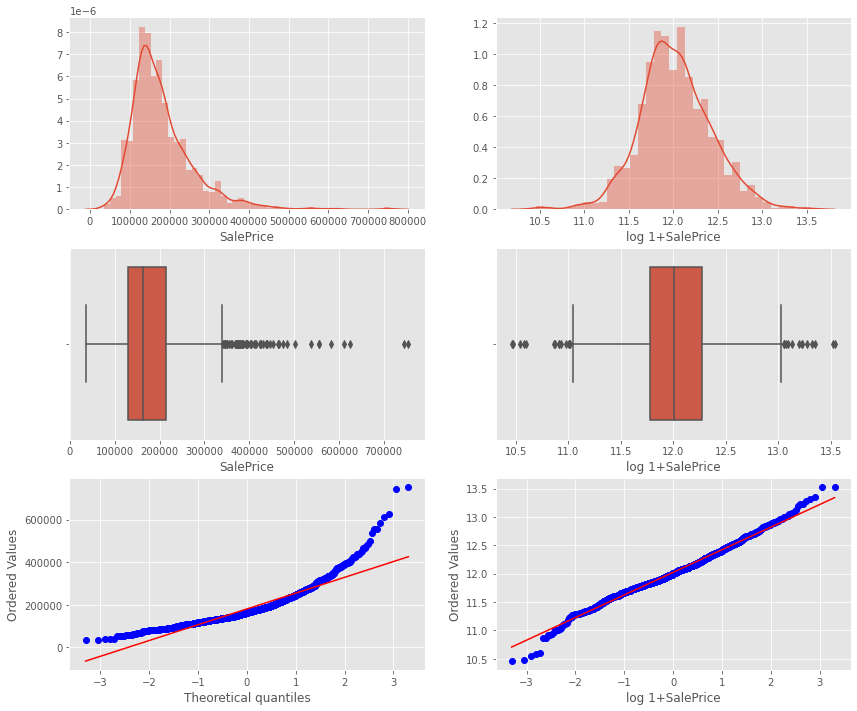

In [14]:
chart_singlevar_dist(housing, 'SalePrice')

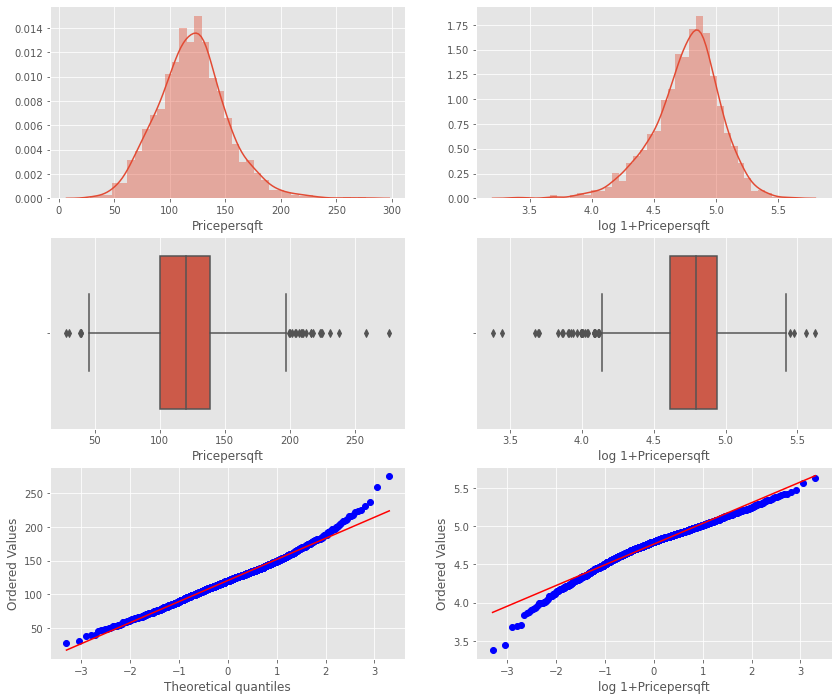

In [15]:
# Create SalePrice per square foot variable and check distribution (no data missing so all good)
housing['Pricepersqft'] = (housing['SalePrice'] / housing['GrLivArea'])
chart_singlevar_dist(housing, 'Pricepersqft')

In [16]:
# No need to use log SalePrice since Pricepersqft variable has much better properties than SalePrice itself.
# Set Pricepersqft as target variable
target = housing.Pricepersqft

In [17]:
summarydf[summarydf.VariableType == 'numerical']

Predictor  ValueCount  MissingCount  TotalCount  MissingPercent  \
0              Id        1460             0        1460        0.000000   
3     LotFrontage        1201           259        1460        0.177397   
4         LotArea        1460             0        1460        0.000000   
17    OverallQual        1460             0        1460        0.000000   
18    OverallCond        1460             0        1460        0.000000   
19      YearBuilt        1460             0        1460        0.000000   
20   YearRemodAdd        1460             0        1460        0.000000   
26     MasVnrArea        1452             8        1460        0.005479   
34     BsmtFinSF1        1460             0        1460        0.000000   
36     BsmtFinSF2        1460             0        1460        0.000000   
37      BsmtUnfSF        1460             0        1460        0.000000   
38    TotalBsmtSF        1460             0        1460        0.000000   
43       1stFlrSF        1460             0        1460        0.000000   
44       2ndFlrSF        1460             0        1460        0.000000   
45   LowQualFinSF        1460             0        1460        0.000000   
46      GrLivArea        1460             0        1460        0.000000   
47   BsmtFullBath        1460             0        1460        0.000000   
48   BsmtHalfBath        1460             0        1460        0.000000   
49       FullBath        1460             0        1460        0.000000   
50       HalfBath        1460             0        1460        0.000000   
51   BedroomAbvGr        1460             0        1460        0.000000   
52   KitchenAbvGr        1460             0        1460        0.000000   
54   TotRmsAbvGrd        1460             0        1460        0.000000   
56     Fireplaces        1460             0        1460        0.000000   
59    GarageYrBlt        1379            81        1460        0.055479   
61     GarageCars        1460             0        1460        0.000000   
62     GarageArea        1460             0        1460        0.000000   
66     WoodDeckSF        1460             0        1460        0.000000   
67    OpenPorchSF        1460             0        1460        0.000000   
68  EnclosedPorch        1460             0        1460        0.000000   
69      3SsnPorch        1460             0        1460        0.000000   
70    ScreenPorch        1460             0        1460        0.000000   
71       PoolArea        1460             0        1460        0.000000   
75        MiscVal        1460             0        1460        0.000000   
77         YrSold        1460             0        1460        0.000000   
80      SalePrice        1460             0        1460        0.000000   

   VariableType  CountCategories   Skewness  SpearmanCorr  NumOutliers  
0     numerical                0   0.000000     -0.018546            0  
3     numerical                0        NaN      0.409076           30  
4     numerical                0  12.195142      0.456461           69  
17    numerical                0   0.216721      0.809829            2  
18    numerical                0   0.692355     -0.129325          125  
19    numerical                0  -0.612831      0.652682            7  
20    numerical                0  -0.503044      0.571159            0  
26    numerical                0        NaN      0.421309           96  
34    numerical                0   1.683771      0.301871            7  
36    numerical                0   4.250888     -0.038806          167  
37    numerical                0   0.919323      0.185197           29  
38    numerical                0   1.522688      0.602725           61  
43    numerical                0   1.375342      0.575408           20  
44    numerical                0   0.812194      0.293598            2  
45    numerical                0   9.002080     -0.067719           26  
46    numerical                0   1.365156      0.731310       

In [18]:
# Linear models are susceptible to features that are not roughly of the same domain in terms of magnitude.
# Hence convert all area variables to be percentage of GrLivArea, which will help normalise information
areavars = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',\
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GarageArea', 'WoodDeckSF',\
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']
for v in areavars:
    housing[v] = housing[v] / housing['GrLivArea']
housing[areavars].describe()

LotFrontage      LotArea   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1201.000000  1460.000000  1452.000000  1460.000000  1460.000000   
mean      0.049868     7.202209     0.061781     0.311646     0.034900   
std       0.019868     5.418378     0.101957     0.300163     0.122030   
min       0.013801     1.057771     0.000000     0.000000     0.000000   
25%       0.036916     5.124285     0.000000     0.000000     0.000000   
50%       0.046542     6.423132     0.000000     0.265037     0.000000   
75%       0.060606     8.400450     0.105884     0.528956     0.000000   
max       0.220779   105.719548     0.964088     1.000354     0.954545   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean      0.387452     0.733998     0.806435     0.190271      0.003294   
std       0.294764     0.272310     0.226291     0.225099      0.027948   
min       0.000000     0.000000     0.257544     0.000000      0.000000   
25%       0.162419     0.500000     0.557612     0.000000      0.000000   
50%       0.332269     0.781627     1.000000     0.000000      0.000000   
75%       0.524760     1.000000     1.000000     0.439329      0.000000   
max       1.000000     1.968079     1.000000     0.742456      0.382055   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean      0.323993     0.062473     0.029474       0.016225     0.002208   
std       0.148638     0.085501     0.045608       0.045240     0.019318   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%       0.246751     0.000000     0.000000       0.000000     0.000000   
50%       0.311559     0.000000     0.016793       0.000000     0.000000   
75%       0.402601     0.107107     0.042141       0.000000     0.000000   
max       1.395973     0.585987     0.726389       0.369509     0.352288   

       ScreenPorch     PoolArea  
count  1460.000000  1460.000000  
mean      0.009642     0.001305  
std       0.036114     0.021980  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     0.000000  
75%       0.000000     0.000000  
max       0.344982     0.515206

In [19]:
# Variables that are highly correlated with SalePrice for initial indication of useful features
summarydf = summarise_data(housing, 'Pricepersqft')
mask = (np.abs(summarydf.SpearmanCorr) > 0.3) & (summarydf.VariableType == 'numerical')
salescorr_vars = list(summarydf.loc[mask, 'Predictor'])
summarydf.loc[mask, :].sort_values('SpearmanCorr', ascending=False)

Predictor  ValueCount  MissingCount  TotalCount  MissingPercent  \
81  Pricepersqft        1460             0        1460        0.000000   
19     YearBuilt        1460             0        1460        0.000000   
62    GarageArea        1460             0        1460        0.000000   
38   TotalBsmtSF        1460             0        1460        0.000000   
59   GarageYrBlt        1379            81        1460        0.055479   
80     SalePrice        1460             0        1460        0.000000   
20  YearRemodAdd        1460             0        1460        0.000000   
34    BsmtFinSF1        1460             0        1460        0.000000   
43      1stFlrSF        1460             0        1460        0.000000   
17   OverallQual        1460             0        1460        0.000000   
61    GarageCars        1460             0        1460        0.000000   
47  BsmtFullBath        1460             0        1460        0.000000   
51  BedroomAbvGr        1460             0        1460        0.000000   
44      2ndFlrSF        1460             0        1460        0.000000   

   VariableType  CountCategories  Skewness  SpearmanCorr  NumOutliers  
81    numerical                0  0.375531      1.000000           25  
19    numerical                0 -0.612831      0.565254            7  
62    numerical                0  0.629797      0.546614          119  
38    numerical                0 -0.459281      0.539134            1  
59    numerical                0       NaN      0.496832            0  
80    numerical                0  1.880941      0.486805           61  
20    numerical                0 -0.503044      0.481761            0  
34    numerical                0  0.533002      0.444882            0  
43    numerical                0 -0.411379      0.424628            0  
17    numerical                0  0.216721      0.408478            2  
61    numerical                0 -0.342197      0.376229            5  
47    numerical                0  0.595454      0.349645            1  
51    numerical                0  0.211572     -0.323834           35  
44    numerical                0  0.430261     -0.408789            0

In [20]:
def corr_plot(df, varlist):
    """
    Takes a dataframe df and plots a spearman rank correlation chart of all combinations of variables identified
    in varlist list of variable names.
    """
    train_corr = df[varlist].corr(method='spearman')
    fig, ax = plt.subplots(figsize=(10, 8))
    # mask
    mask = np.triu(np.ones_like(train_corr, dtype=np.bool))
    # adjust mask and df
    corr = train_corr.iloc[1:,:-1].copy()
    # plot heatmap
    sns.heatmap(train_corr, mask=mask, annot=False, fmt=".2f", cmap='Blues',
                vmin=-1, vmax=1, cbar_kws={"shrink": .8})
    # yticks
    plt.yticks(rotation=0)
    return plt.show()

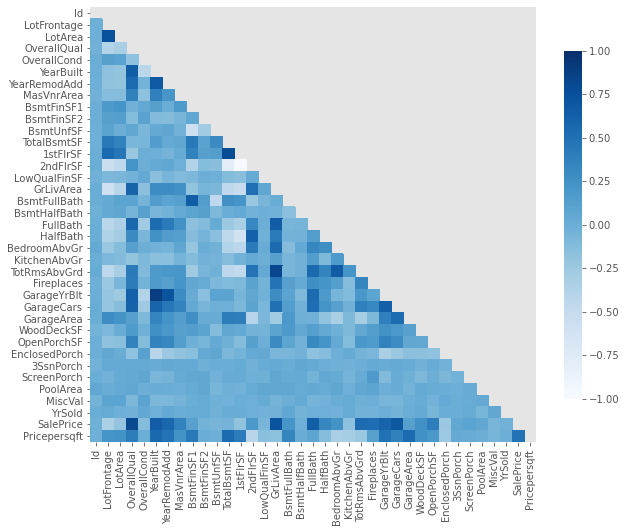

In [21]:
# Correlation plot of all variables
corr_plot(housing, list(housing.columns))

In [22]:
# Correlation plot of predictor variables with abs(corr) > 0.7 to detect multicollinearity
corr_matrix = housing.drop(['Id','Pricepersqft','SalePrice', 'GrLivArea'], axis=1).corr(method='spearman').corr().abs()
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False))
sol = pd.DataFrame(sol).reset_index()
sol.columns = ['var1','var2','cor']
print(sol.loc[sol.cor > 0.7,:])
mcvar = list(sol.loc[sol.cor > 0.7,:].drop('cor', axis=1).melt().value.unique())

            var1           var2       cor
0       1stFlrSF       2ndFlrSF  0.998210
1      YearBuilt    GarageYrBlt  0.985106
2    TotalBsmtSF       1stFlrSF  0.968066
3    LotFrontage        LotArea  0.965029
4    TotalBsmtSF       2ndFlrSF  0.963472
5   YearRemodAdd    GarageYrBlt  0.946384
6      YearBuilt   YearRemodAdd  0.928720
7    GarageYrBlt     GarageCars  0.903551
8       2ndFlrSF       HalfBath  0.902193
9      YearBuilt     GarageCars  0.899617
10   OverallQual     GarageCars  0.893572
11      1stFlrSF       HalfBath  0.893123
12   OverallQual       FullBath  0.888765
13  BedroomAbvGr   TotRmsAbvGrd  0.883031
14    BsmtFinSF1   BsmtFullBath  0.877217
15   OverallQual    GarageYrBlt  0.875276
16   OverallQual      YearBuilt  0.871057
17   LotFrontage   TotRmsAbvGrd  0.868357
18   OverallQual   YearRemodAdd  0.866284
19      2ndFlrSF   TotRmsAbvGrd  0.855801
20   LotFrontage       2ndFlrSF  0.854978
21   LotFrontage       1stFlrSF  0.852241
22      1stFlrSF   TotRmsAbvGrd  0

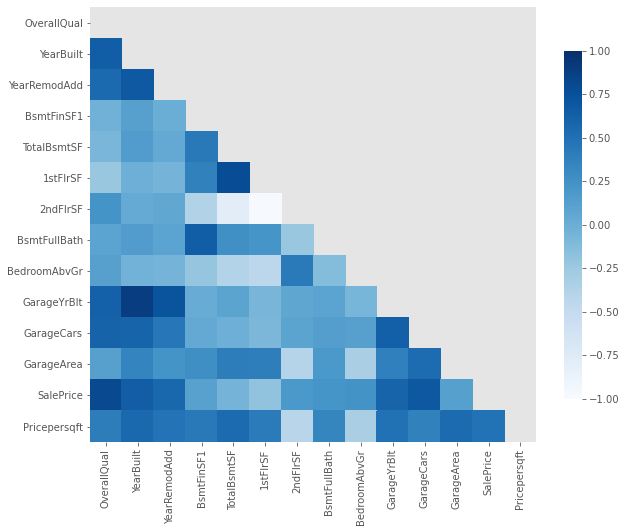

In [23]:
# Correlation plot of variables with >0.6 correlation with Pricepersqft to identify features that are useful
corr_plot(housing, salescorr_vars)

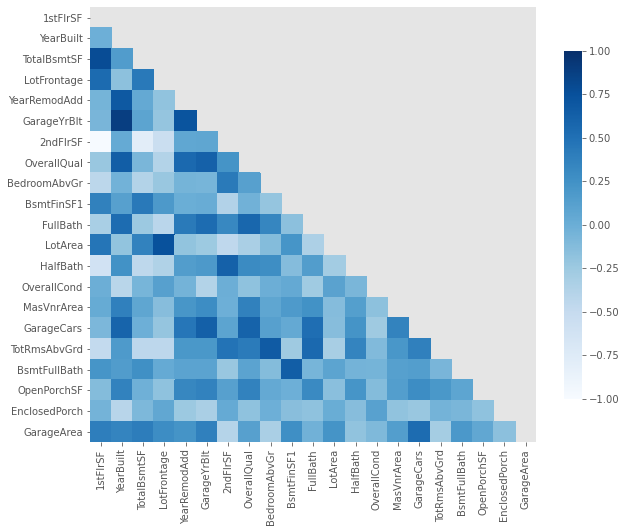

In [24]:
corr_plot(housing, mcvar)

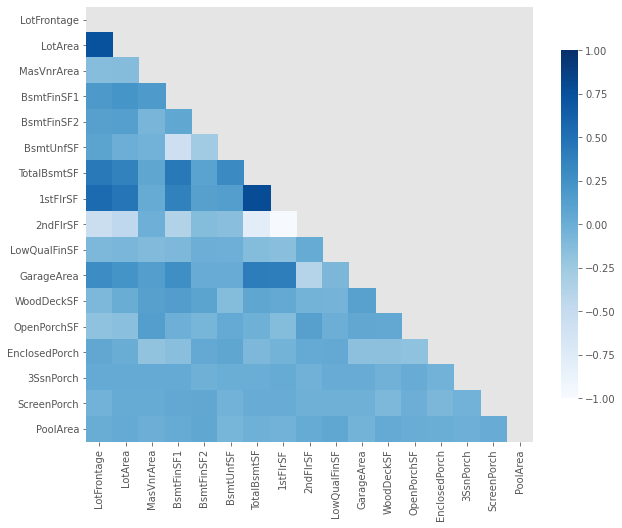

In [25]:
corr_plot(housing, areavars)

## Data Exploration Insights
1. There are 79 features with a sample of 1460 homes that we can use to try model SalePrice of homes in Ames. 
2. Initially, the features consist of 34 numerical and 45 categorical variables and has lots of missing data as well as apparent outliers.
3. There are a few skewed distributions of features, which would require some sort of transformation if using linear models to predict SalePrice.
4. The distribution of SalePrice itself, is skewed-right and 'Sale Price per square foot' makes the data look decently normal, which is encouraging if we want to apply the class of linear models.
5. Important predictors of Pricepersqft are: OverallQual, YearBuilt, variables related to size, variables related to Garage.
6. Initial assessments of Spearman correlation coefficients indicate there is duplicate information within features like: GarageCars/GarageArea, YrBuilt/GarageYrBlt, TotalBsmtSF/1stFlrSF, GrLivArea/TotRmsAbvGrd.
7. Before conducting feature engineering, we will pre-process data for missingness and duplication

## Dealing with missingness
1. Most data are not missing at random, they represent the lack of feature i.e don't have a pool or fireplace

In [26]:
# Straightforward Not Missing At Random (NMAR) in that missing means not available or present, set those to N
setnolist = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish',\
             'GarageQual', 'GarageCond', 'BsmtExposure', 'BsmtFinType2','BsmtFinType1', 'BsmtCond',\
             'BsmtQual']
housing[setnolist] = housing[setnolist].fillna('N')

In [27]:
# Straightforward NMAR in that missing means not available or present, set those to None
housing['MasVnrType'] = housing['MasVnrType'].fillna('None')

In [28]:
# These variables are not straightforward to complete missingness

# Electrical
housing['Electrical'].value_counts()
# The category Mix represents a mixed electrical system and there is only one house with this system. Use this for the single missing value
# since it won't make a material difference.
housing['Electrical'] = housing['Electrical'].fillna('Mix')

# MasVnrArea
msonlist = ['MasVnrArea', 'MasVnrType']
housing.loc[housing['MasVnrArea'].isnull(), msonlist]
# It turns out that all of the houses with missing MasVnrArea don't have a Masonry Veneer. So can set to 0
housing['MasVnrArea'].fillna(0,inplace=True)

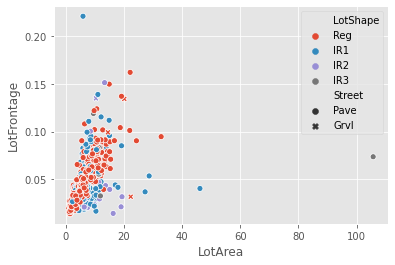

In [29]:
#LotFrontage
lotlist = ['LotFrontage', 'LotArea', 'LotShape', 'Street']
housing.loc[housing['LotFrontage'].isnull(), lotlist]

# See relationship between LotFront and Lot Area
normlot=housing[lotlist]
#normlot = housing[lotlist].dropna()
#normlot = normlot.loc[normlot[['LotFrontage', 'LotArea']].apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
sns.scatterplot(data=normlot, x='LotArea', y='LotFrontage', hue='LotShape', style='Street')

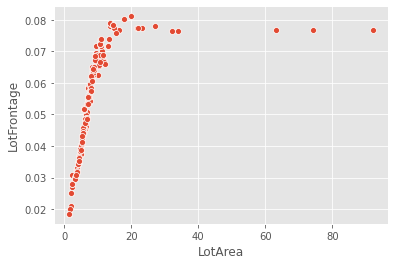

In [30]:
# LotFrontage appears to be Missing at Random (MAR) so use kNN imputation
# Sqrt(1200) is about 35, so use that for K, which will also be robust to outliers (which is present)
imputer = KNNImputer(n_neighbors=35)
lotlist = ['LotFrontage', 'LotArea']
imputedvals = pd.DataFrame(imputer.fit_transform(housing[lotlist]), columns=lotlist)
sns.scatterplot(data=imputedvals.loc[housing['LotFrontage'].isnull(), lotlist], x='LotArea', y='LotFrontage')
# Most of the data imputation <50000 LotArea makese sense but there are a few outliers for larger LotArea. This is fine for now
# because we will deal with outliers later.
housing['LotFrontage'] = imputedvals['LotFrontage']

In [31]:
garagelist = ['GarageYrBlt', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual']
print(housing.loc[housing['GarageYrBlt'].isnull(), garagelist]['GarageType'].shape)
print(housing.loc[housing['GarageYrBlt'].isnull(), garagelist]['GarageType'].value_counts())
# Easy one to solve, GarageYrBlt is not missing at random, it is because there is no Garage. Impute with zeros
housing['GarageYrBlt'].fillna(0,inplace=True)

(81,)
N    81
Name: GarageType, dtype: int64


In [32]:
# Check for missing values in total dataset again
housing.isna().sum().sum()

0

**Excellent! we have dealt with all missing values.**

## Before any feature selecting try Lasso regression to see what results can be obtained

In [33]:
# Define function to run Lasso to check scores
def run_lasso(housing):
    # Re-run summary for categorical vs numerical features
    summarydf = summarise_data(housing, 'SalePrice')
    mask = summarydf.VariableType == 'categorical'
    categorical_vars = list(summarydf.loc[mask, 'Predictor'])
    mask = summarydf.VariableType == 'numerical'
    numerical_vars = list(summarydf.loc[mask, 'Predictor'])
    # Redo target variable in case data points/outliers were dropped
    target = housing.Pricepersqft
    # Remove predictor and unnecessary variables
    dropvar = ['Id', 'SalePrice', 'Pricepersqft', 'GrLivArea']
    for v in dropvar:
        numerical_vars.remove(v)
    features = housing.drop(dropvar, axis=1)
    # Use one-hot encoding of categorical variables
    onehothousing = pd.get_dummies(features, columns=categorical_vars, prefix=categorical_vars, drop_first=True)
        
    # Train Test split
    X_train, X_test, y_train, y_test = train_test_split(onehothousing, target, test_size=0.3, random_state=28)
    
    # Lasso model using 10fold CV and grid search
    lasso = Lasso()
    lasso.set_params(normalize=False)
    grid_para_lasso = {'alpha': np.arange(0,1,0.05)}
    grid_search_lasso = ms.GridSearchCV(lasso, grid_para_lasso, cv=10, scoring='r2').fit(X_train, y_train)
    print('The best score is %.4f' %grid_search_lasso.best_score_)
    print('The training error is %.4f' %(1 - grid_search_lasso.best_estimator_.score(X_train, y_train)))
    print('The testing error is %.4f' %(1 - grid_search_lasso.best_estimator_.score(X_test, y_test)))

In [34]:
# Check scores before feature engineering
run_lasso(housing)

The best score is 0.7879
The training error is 0.1499
The testing error is 0.2842


In [35]:
# As expected, low training error vs test error to indicate overfitting due to the large amount of variables that 
# are correlated.

## Feature Engineering
1. Check features identified to have outliers and remove obvious ones
2. Consider transformations when it appears that feature is skewed or has many outliers

In [36]:
# Variables with Outliers ranked by number of identified
summarydf = summarise_data(housing, 'Pricepersqft')
mask = (np.abs(summarydf.NumOutliers) !=0) & (summarydf.VariableType == 'numerical')
outlier_vars = list(summarydf.loc[mask, 'Predictor'])
summarydf.loc[mask, :].sort_values('NumOutliers', ascending=False)

Predictor  ValueCount  MissingCount  TotalCount  MissingPercent  \
68  EnclosedPorch        1460             0        1460             0.0   
36     BsmtFinSF2        1460             0        1460             0.0   
18    OverallCond        1460             0        1460             0.0   
62     GarageArea        1460             0        1460             0.0   
70    ScreenPorch        1460             0        1460             0.0   
48   BsmtHalfBath        1460             0        1460             0.0   
59    GarageYrBlt        1460             0        1460             0.0   
67    OpenPorchSF        1460             0        1460             0.0   
26     MasVnrArea        1460             0        1460             0.0   
52   KitchenAbvGr        1460             0        1460             0.0   
4         LotArea        1460             0        1460             0.0   
80      SalePrice        1460             0        1460             0.0   
75        MiscVal        1460             0        1460             0.0   
66     WoodDeckSF        1460             0        1460             0.0   
51   BedroomAbvGr        1460             0        1460             0.0   
46      GrLivArea        1460             0        1460             0.0   
54   TotRmsAbvGrd        1460             0        1460             0.0   
45   LowQualFinSF        1460             0        1460             0.0   
81   Pricepersqft        1460             0        1460             0.0   
69      3SsnPorch        1460             0        1460             0.0   
3     LotFrontage        1460             0        1460             0.0   
71       PoolArea        1460             0        1460             0.0   
19      YearBuilt        1460             0        1460             0.0   
61     GarageCars        1460             0        1460             0.0   
56     Fireplaces        1460             0        1460             0.0   
17    OverallQual        1460             0        1460             0.0   
47   BsmtFullBath        1460             0        1460             0.0   
38    TotalBsmtSF        1460             0        1460             0.0   

   VariableType  CountCategories   Skewness  SpearmanCorr  NumOutliers  
68    numerical                0   3.078536     -0.240165          208  
36    numerical                0   4.209654      0.005284          167  
18    numerical                0   0.692355      0.002643          125  
62    numerical                0   0.629797      0.546614          119  
70    numerical                0   4.245385      0.021257          116  
48    numerical                0   4.099186      0.011053           82  
59    numerical                0  -3.865524      0.513072           81  
67    numerical                0   4.334900      0.198047           80  
26    numerical                0   2.481626      0.234209           76  
52    numerical                0   4.483784     -0.294224           68  
4     numerical                0   9.585405      0.235769           64  
80    numerical                0   1.880941      0.486805           61  
75    numerical                0  24.451640     -0.059721           52  
66    numerical                0   1.668759      0.252701           44  
51    numerical                0   0.211572     -0.323834           35  
46    numerical                0   1.365156     -0.163422           31  
54    numerical                0   0.675646     -0.231209           30  
45    numerical                0   9.728044     -0.152888           26  
81    numerical                0   0.375531      1.000000           25  
69    numerical                0  10.898977      0.036842           24  
3     numerical                0   1.360061      0.220986           20  
71    numerical                0  19.786997     -0.005694            7  
19    numerical                0  -0.612831      0.565254            7  
61    numerical                0  -0.342197      0.376229            5  
56    n

### Explore porch-related variables

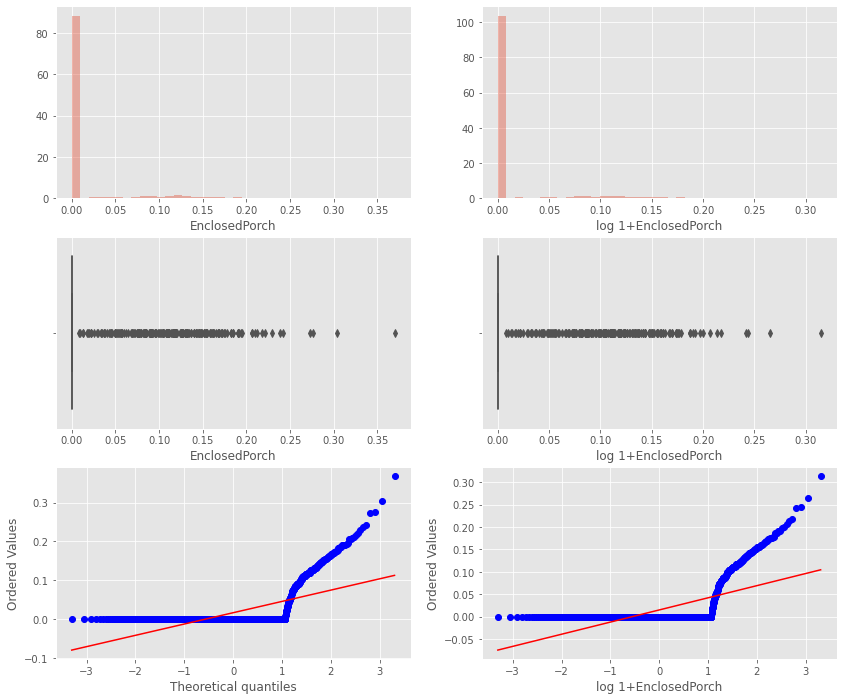

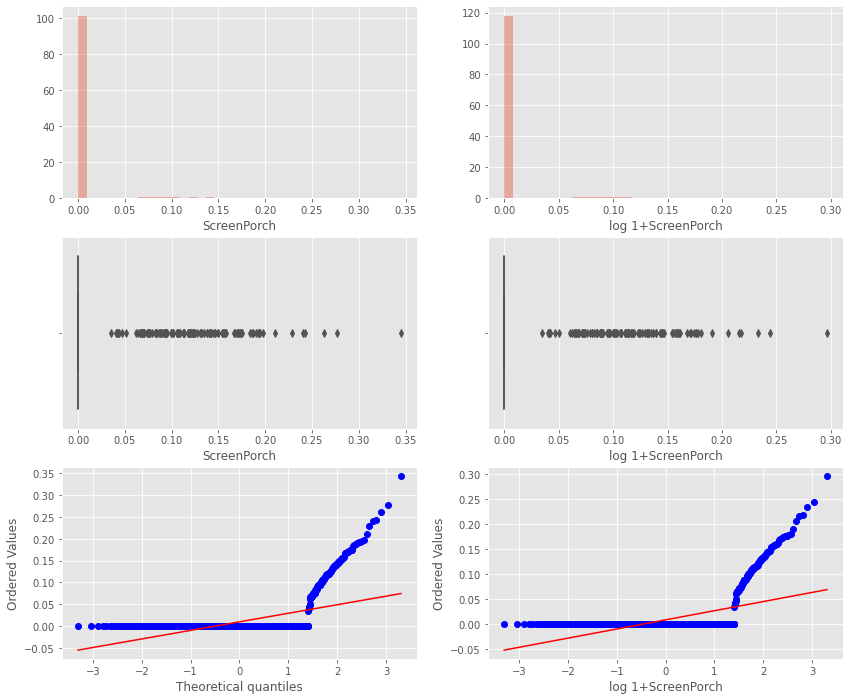

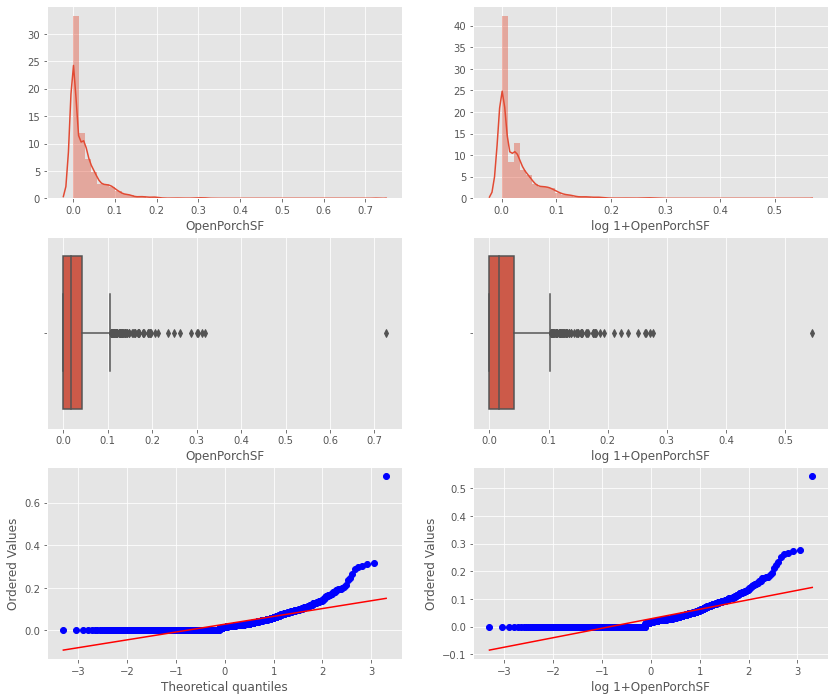

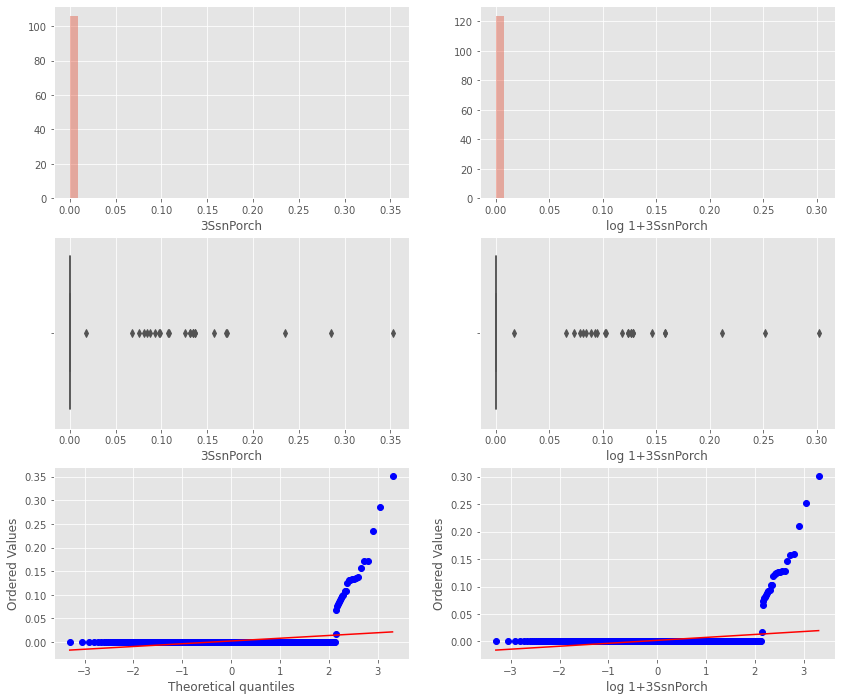

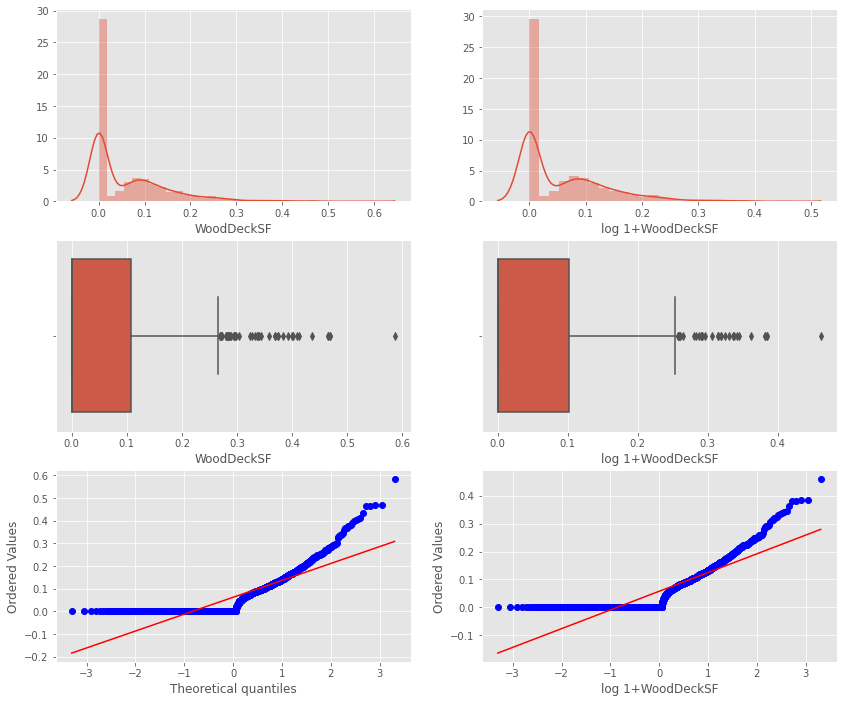

In [37]:
chart_singlevar_dist(housing, 'EnclosedPorch')
chart_singlevar_dist(housing, 'ScreenPorch')
chart_singlevar_dist(housing, 'OpenPorchSF')
chart_singlevar_dist(housing, '3SsnPorch')
chart_singlevar_dist(housing, 'WoodDeckSF')
# All of these variables are imbalanced due to many zeros which represent lack of feature. Consider making these categorical variables

In [38]:
def priceplots(var, bins):
    """
    Scatterplot of relevant porch variable against SalePrice with and without bins. Only filters for non-zero
    values of porch variable and shows 2 charts, one without bins and one with bins. This helps to identify
    cut-off values of porch variable to convert numeric feature into categorical feature
    """
    fig, ax = plt.subplots(figsize=(12, 4), ncols=2, sharex=False, sharey=True)
    sns.regplot(data=housing[(housing[var]!=0)], x=var, y='Pricepersqft', ax=ax[0])
    sns.regplot(data=housing[(housing[var]!=0)], x=var, y='Pricepersqft', x_bins=bins, ax=ax[1])
    ax[0].set(xlabel = var + ' (non-zero values)', title='No Bins')
    ax[1].set(xlabel = var + ' (non-zero values)', title='With Bins')

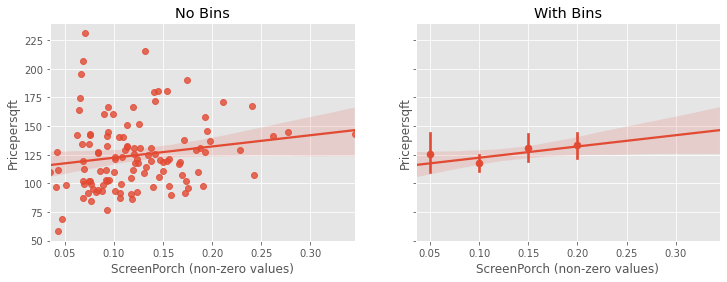

In [39]:
# Plot screenporch scatter charts    
priceplots('ScreenPorch',[0.05,0.10,0.15,0.20])
# It appears that 0.075, 0.125 are good cut-off values

In [40]:
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val == 0:
        return 'N'
    elif val > 0 and val <= 0.075:
        return '0to075'
    elif val > 0.075 and val <= 0.125:
        return '075to125'
    elif val > 0.125:
        return '0125plus'
housing['ScreenPorch'] = housing['ScreenPorch'].apply(categorize)
housing['ScreenPorch'].value_counts()

N           1344
075to125      49
0125plus      45
0to075        22
Name: ScreenPorch, dtype: int64

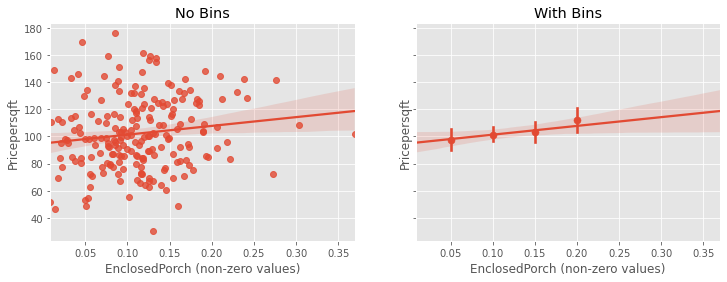

In [41]:
# Plot EnclosedPorch scatter charts    
priceplots('EnclosedPorch',[0.05,0.10,0.15,0.20])
# It appears that 0.15 is a good cut-off value

In [42]:
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val == 0:
        return 'N'
    elif val > 0 and val <= 0.15:
        return '0to150'
    elif val > 0.15:
        return '150plus'
housing['EnclosedPorch'] = housing['EnclosedPorch'].apply(categorize)
housing['EnclosedPorch'].value_counts()

N          1252
0to150      160
150plus      48
Name: EnclosedPorch, dtype: int64

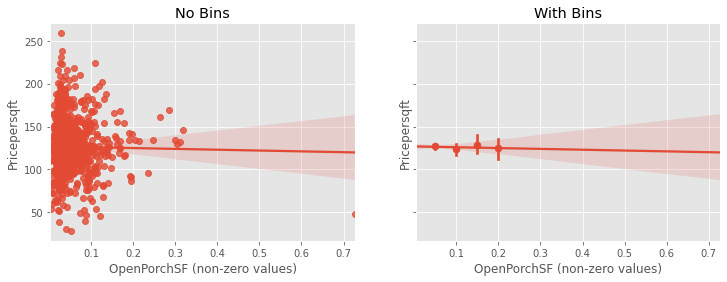

In [43]:
# Plot OpenPorchSF scatter charts    
priceplots('OpenPorchSF',[0.05,0.10,0.15,0.20])
# Can't gauga cut-off value due to outlier

In [44]:
# Outlier also has abnormal sale condition, drop record
housing.loc[housing.OpenPorchSF > 0.5]

Id MSSubClass MSZoning  LotFrontage    LotArea Street Alley LotShape  \
495  496         30  C (all)     0.083333  10.943056   Pave     N      Reg   

    LandContour Utilities  ... PoolQC Fence MiscFeature MiscVal MoSold YrSold  \
495         Lvl    AllPub  ...      N  GdWo           N       0     11   2009   

    SaleType  SaleCondition  SalePrice  Pricepersqft  
495       WD        Abnorml      34900     48.472222  

[1 rows x 82 columns]

In [45]:
# Drop outlier
dropindex = housing[housing.OpenPorchSF > 0.5].index
housing.drop(dropindex, axis=0, inplace=True)

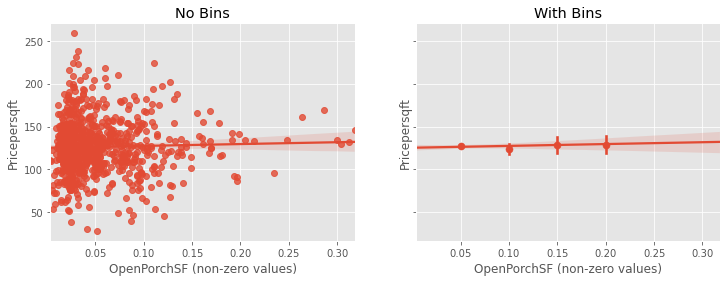

In [46]:
# Plot OpenPorchSF scatter charts    
priceplots('OpenPorchSF',[0.05,0.10,0.15,0.20])
# It appears that 0.15 is a good cut-off value

In [47]:
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val == 0:
        return 'N'
    elif val > 0 and val <= 0.15:
        return '0to150'
    elif val > 0.15:
        return '150plus'
housing['OpenPorchSF'] = housing['OpenPorchSF'].apply(categorize)
housing['OpenPorchSF'].value_counts()

0to150     774
N          656
150plus     29
Name: OpenPorchSF, dtype: int64

In [48]:
# Rename OpenPorchSF variable to remove SF
housing.rename(columns={'OpenPorchSF': 'OpenPorch'}, inplace=True)

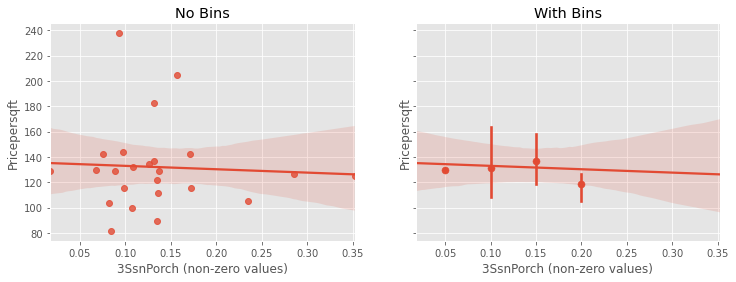

In [49]:
# Plot 3SsnPorch scatter charts    
priceplots('3SsnPorch',[0.05,0.10,0.15,0.20])
# No need for cut-off value
# R2 is 0.015 and after dummification, it's 0.018. No value to keeping this very sparse variable so drop it
housing.drop('3SsnPorch', axis=1, inplace=True)

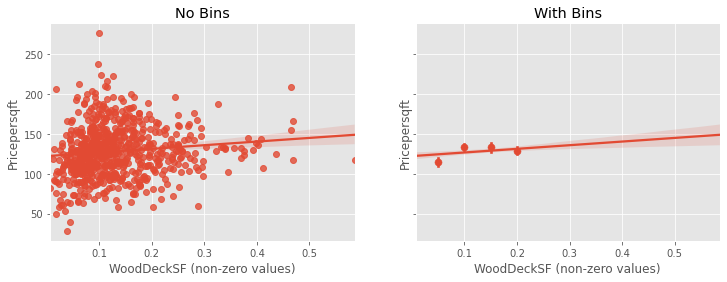

In [50]:
# Plot WoodDeckSF scatter charts    
priceplots('WoodDeckSF',[0.05,0.10,0.15,0.20])
# It appears that no cut-off value is required.
# R2 is 0.387 and after dummification it's 0.506. Hence dummification increases explain without introducing
# and additional dimension.

In [51]:
# Drop outlier
dropindex = housing[housing.WoodDeckSF > 0.5].index
housing.drop(dropindex, axis=0, inplace=True)

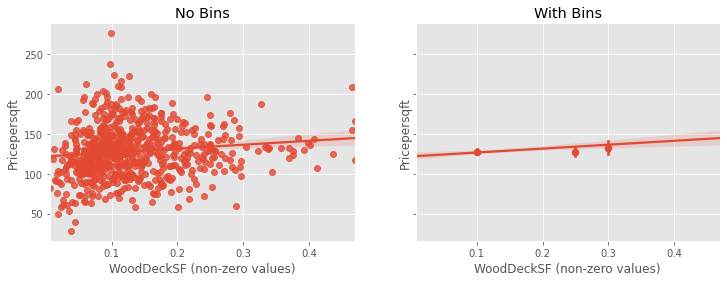

In [52]:
# Plot WoodDeckSF scatter charts    
priceplots('WoodDeckSF',[0.10,0.25,0.30])
# It appears that no cut-off value is required.
# R2 is 0.387 and after dummification it's 0.506. Hence dummification increases explain without introducing
# and additional dimension.

In [53]:
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val == 0:
        return 'N'
    else:
        return 'Y'
housing['WoodDeckSF'] = housing['WoodDeckSF'].apply(categorize)
housing['WoodDeckSF'].value_counts()

N    760
Y    698
Name: WoodDeckSF, dtype: int64

In [54]:
# Rename WoodDeckSF to WoodDeck
housing.rename(columns={'WoodDeckSF': 'WoodDeck'}, inplace=True)

In [55]:
# Variables with Outliers ranked by number of identified
summarydf = summarise_data(housing, 'Pricepersqft')
mask = (np.abs(summarydf.NumOutliers) !=0) & (summarydf.VariableType == 'numerical')
outlier_vars = list(summarydf.loc[mask, 'Predictor'])
summarydf.loc[mask, :].sort_values('Skewness', ascending=False)

Predictor  ValueCount  MissingCount  TotalCount  MissingPercent  \
74       MiscVal        1458             0        1458             0.0   
70      PoolArea        1458             0        1458             0.0   
45  LowQualFinSF        1458             0        1458             0.0   
4        LotArea        1458             0        1458             0.0   
52  KitchenAbvGr        1458             0        1458             0.0   
36    BsmtFinSF2        1458             0        1458             0.0   
48  BsmtHalfBath        1458             0        1458             0.0   
26    MasVnrArea        1458             0        1458             0.0   
79     SalePrice        1458             0        1458             0.0   
46     GrLivArea        1458             0        1458             0.0   
3    LotFrontage        1458             0        1458             0.0   
18   OverallCond        1458             0        1458             0.0   
54  TotRmsAbvGrd        1458             0        1458             0.0   
56    Fireplaces        1458             0        1458             0.0   
62    GarageArea        1458             0        1458             0.0   
47  BsmtFullBath        1458             0        1458             0.0   
80  Pricepersqft        1458             0        1458             0.0   
17   OverallQual        1458             0        1458             0.0   
51  BedroomAbvGr        1458             0        1458             0.0   
61    GarageCars        1458             0        1458             0.0   
38   TotalBsmtSF        1458             0        1458             0.0   
19     YearBuilt        1458             0        1458             0.0   
59   GarageYrBlt        1458             0        1458             0.0   

   VariableType  CountCategories   Skewness  SpearmanCorr  NumOutliers  
74    numerical                0  24.434913     -0.060021           52  
70    numerical                0  19.773339     -0.005777            7  
45    numerical                0   9.721175     -0.153241           26  
4     numerical                0   9.585169      0.237949           64  
52    numerical                0   4.480268     -0.294840           68  
36    numerical                0   4.218199      0.005057          166  
48    numerical                0   4.095895      0.010751           82  
26    numerical                0   2.479606      0.233584           76  
79    numerical                0   1.886221      0.485903           61  
46    numerical                0   1.366121     -0.165689           31  
3     numerical                0   1.364527      0.223317           20  
18    numerical                0   0.691953      0.002085          125  
54    numerical                0   0.675655     -0.233509           30  
56    numerical                0   0.646928      0.111982            5  
62    numerical                0   0.634212      0.545853          117  
47    numerical                0   0.596247      0.349392            1  
80    numerical                0   0.380733      1.000000           25  
17    numerical                0   0.215215      0.407551            2  
51    numerical                0   0.210649     -0.325913           35  
61    numerical                0  -0.341438      0.375058            5  
38    numerical                0  -0.457128      0.541683            1  
19    numerical                0  -0.614813      0.564528            7  
59    numerical                0  -3.890833      0.512236           80

### Explore Misc. variables

In [56]:
housing.MiscFeature.value_counts()

N       1404
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

In [57]:
housing[housing.MiscFeature == 'TenC']

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1386  1387         60       RL     0.028736  5.99569   Pave     N      IR1   

     LandContour Utilities  ... PoolQC  Fence MiscFeature MiscVal MoSold  \
1386         Lvl    AllPub  ...     Fa  MnPrv        TenC    2000      7   

     YrSold SaleType  SaleCondition  SalePrice  Pricepersqft  
1386   2006       WD         Normal     250000     89.798851  

[1 rows x 81 columns]

In [58]:
housing[housing.MiscFeature == 'Shed']['MiscVal'].describe()

count      49.000000
mean      697.836735
std       512.853266
min         0.000000
25%       400.000000
50%       500.000000
75%       700.000000
max      2500.000000
Name: MiscVal, dtype: float64

In [59]:
# Remove data points for Tennis Court, Garage2, and Other 2 since not enough data to make any meaningful conclusions
# Dummify variable to indicate shed or no shed
# Drop MiscVal variable since not really interested in value of shed
dropindex = housing[(housing.MiscFeature == 'TenC') | (housing.MiscFeature == 'Othr') | (housing.MiscFeature == 'Gar2')].index
housing.drop(dropindex, axis=0, inplace=True)

In [60]:
# Rename MiscFeature to Shed 
housing.rename(columns={'MiscFeature': 'Shed'}, inplace=True)

In [61]:
housing['Shed'].value_counts()

N       1404
Shed      49
Name: Shed, dtype: int64

In [62]:
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val == 'Shed':
        return 'Y'
    else: return 'N'
housing['Shed'] = housing['Shed'].apply(categorize)
housing['Shed'].value_counts()

N    1404
Y      49
Name: Shed, dtype: int64

In [63]:
# Drop MiscVal and MiscFeature
housing.drop('MiscVal',axis=1, inplace=True)

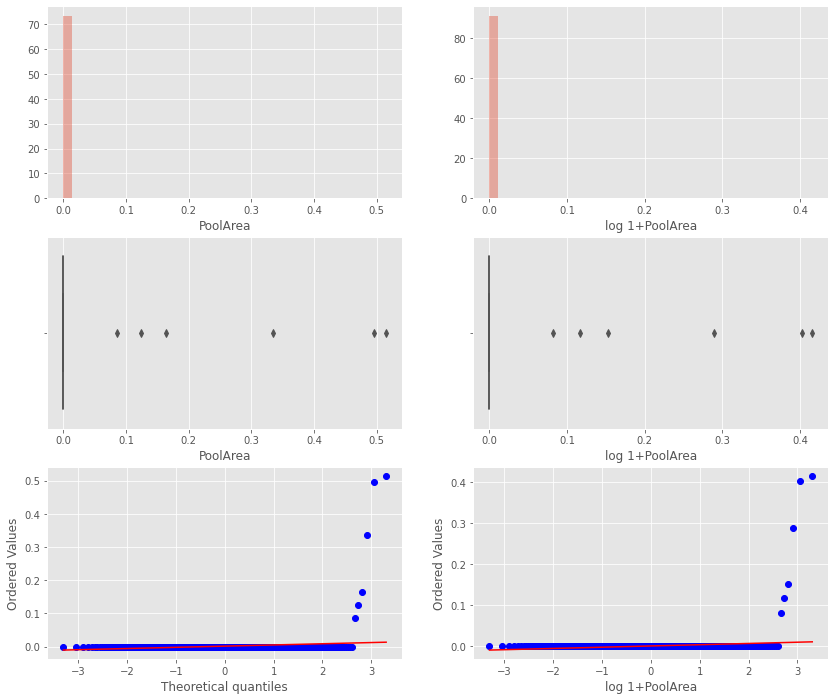

In [64]:
# Pool Area
chart_singlevar_dist(housing, 'PoolArea')

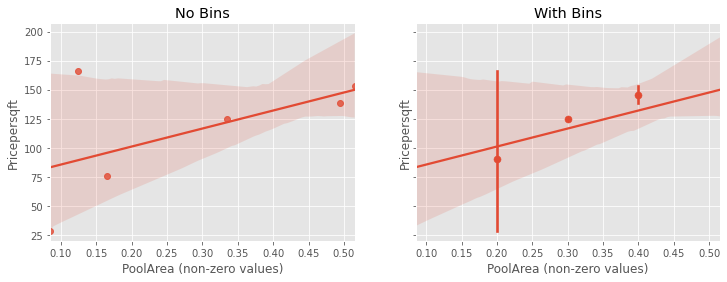

In [65]:
# Plot PoolArea scatter charts    
priceplots('PoolArea',[0.2,0.3,0.4])
# Only 6 datapoints out of >1400 so drop Pool variables since may not be able to make meaningful predictions

In [66]:
# Drop Pool feature
housing.drop('PoolArea',axis=1, inplace=True)
housing.drop('PoolQC',axis=1, inplace=True)

## Dealing with outliers

In [67]:
housing[housing.LotArea > 20]

Id MSSubClass MSZoning  LotFrontage     LotArea Street Alley LotShape  \
53      54         20       RL     0.036916   27.291531   Pave     N      IR1   
120    121         80       RL     0.077390   21.713563   Pave     N      IR1   
249    250         50       RL     0.076894   74.160448   Pave     N      IR2   
271    272         20       RL     0.053558   28.689655   Pave     N      IR1   
277    278         20       RL     0.162037   22.150463   Pave     N      Reg   
313    314         20       RL     0.073674  105.719548   Pave     N      IR3   
335    336        190       RL     0.076894   92.194849   Grvl     N      IR1   
384    385         60       RL     0.078049   27.192524   Pave     N      IR2   
411    412        190       RL     0.094697   32.812500   Pave     N      Reg   
422    423         20       RL     0.101215   22.014170   Pave     N      Reg   
451    452         20       RL     0.040444   46.158513   Pave     N      IR1   
457    458         20       RL     0.076594   32.006615   Pave     N      IR1   
706    707         20       RL     0.076894   63.129934   Pave     N      IR2   
876    877         20       RL     0.090385   24.313462   Pave     N      Reg   
1061  1062         30  C (all)     0.134228   20.134228   Grvl     N      Reg   
1184  1185         20       RL     0.031807   22.349237   Grvl     N      Reg   
1190  1191        190       RL     0.081119   20.014180   Pave     N      Reg   
1287  1288         20       RL     0.077390   23.072061   Pave     N      IR1   
1396  1397         20       RL     0.076594   33.906343   Pave     N      IR1   
1446  1447         20       RL     0.077390   22.005051   Pave     N      IR1   

     LandContour Utilities  ... EnclosedPorch ScreenPorch Fence Shed MoSold  \
53           Low    AllPub  ...             N           N     N    N     11   
120          Low    AllPub  ...             N           N     N    N     10   
249          Low    AllPub  ...             N           N     N    Y      6   
271          Low    AllPub  ...             N           N     N    N      4   
277          Lvl    AllPub  ...             N           N     N    N      6   
313          Low    AllPub  ...             N           N     N    N      6   
335          HLS    AllPub  ...             N           N     N    Y      8   
384          Low    AllPub  ...             N           N     N    N      6   
411          Bnk    AllPub  ...             N           N     N    N      1   
422          HLS    AllPub  ...             N           N     N    N      2   
451          Low    AllPub  ...             N           N     N    N     12   
457          Low    AllPub  ...             N           N     N    N      3   
706          Low    AllPub  ...             N           N     N    N      6   
876          HLS    AllPub  ...             N           N     N    N      1   
1061         Low    AllPub  ...             N           N     N    Y      8   
1184         Lvl    AllPub  ...             N    0125plus     N    N      5   
1190         Low    AllPub  ...             N           N     N    N      3   
1287         Low    AllPub  ...             N           N     N    N      6   
1396         Bnk    AllPub  ...        0to150           N     N    N      6   
1446         Lvl    AllPub  ...             N           N     N    N      4   

     YrSold SaleType  SaleCondition  SalePrice  Pricepersqft  
53     2006       WD         Normal     385000    209.011944  
120    2006       WD         Normal     180000    182.186235  
249    2007       WD         Normal     277000    129.197761  
271    2008       WD         Normal     241500    177.182685  
277    2010       WD         Normal     141000    163.194444  
313    2009       WD         Normal     375000    184.184676  
335    2008       WD         Normal     228950    128.191489  
384    2007       WD         Normal     240000    122.887865  
411    2006       WD         Normal     145000    137.310606  
422    2008     

In [68]:
# Drop records with Lot sizes that are greater than 20 times the house size since these are likely special cases
# In addition, only 20 records out of >1400 so still materially small size
dropindex = housing[housing.LotArea > 20].index
housing.drop(dropindex, axis=0, inplace=True)

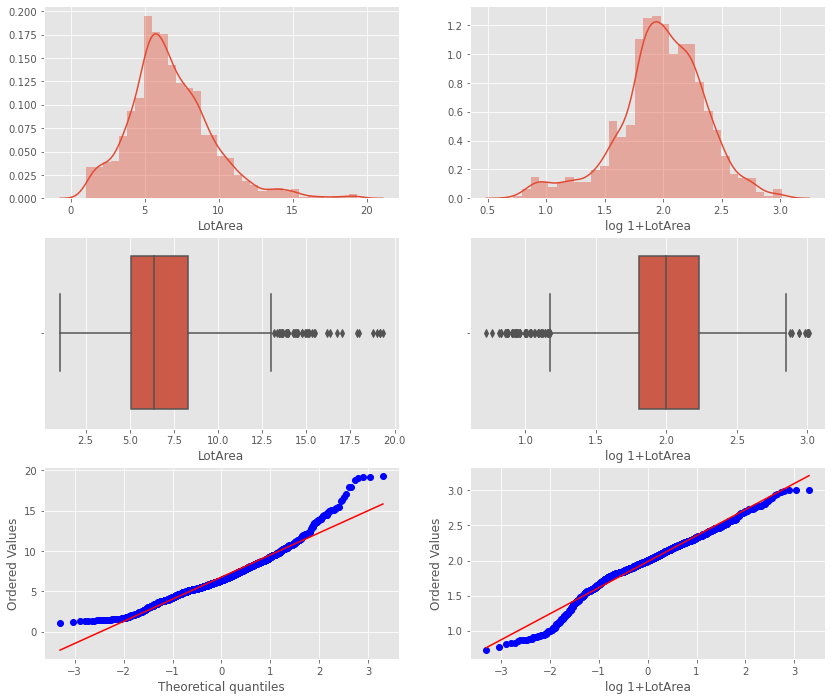

In [69]:
# Lot Area
chart_singlevar_dist(housing, 'LotArea')

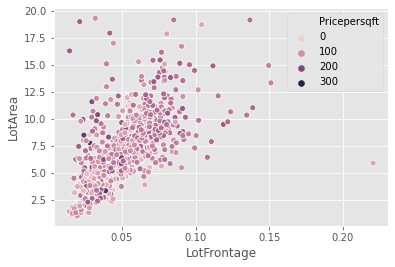

In [70]:
sns.scatterplot(data=housing, x='LotFrontage', y='LotArea', hue='Pricepersqft')

In [71]:
# LotArea and LotFrontage have a relationship so drop LotFrontage since what really matters is LotSize
housing.drop('LotFrontage', axis=1, inplace=True)

In [72]:
# Make LotShape binary Regular or Irregular
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val == 'Reg':
        return 'Reg'
    else: return 'Irreg'
housing['LotShape'] = housing['LotShape'].apply(categorize)
housing['LotShape'].value_counts()

Reg      914
Irreg    519
Name: LotShape, dtype: int64

In [73]:
housing.Street.value_counts()

Pave    1430
Grvl       3
Name: Street, dtype: int64

In [74]:
# Drop street feature since only 3 values with gravel and not important feature from initial indications
housing.drop('Street', axis=1, inplace=True)

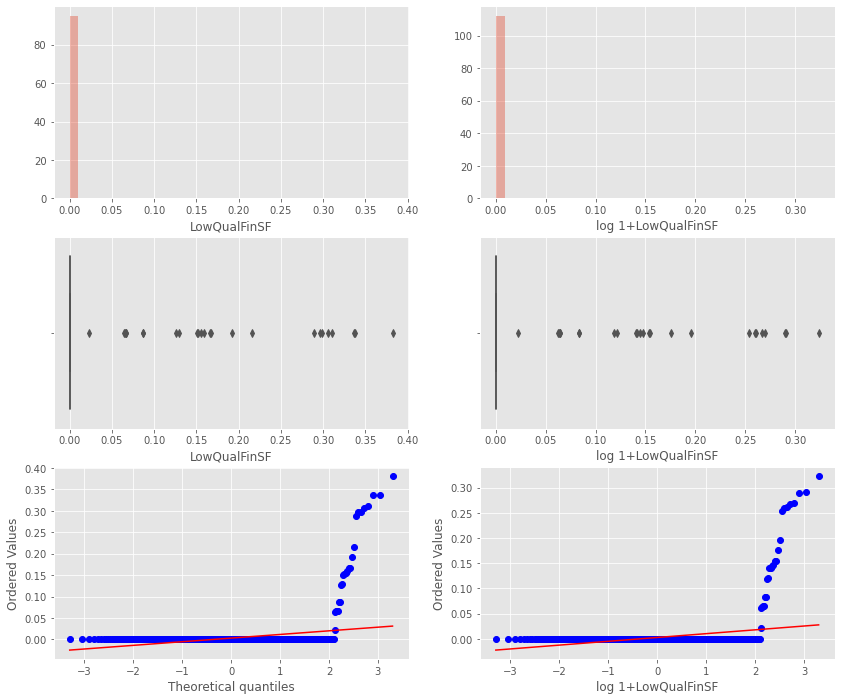

In [75]:
# LowQualFinSF
chart_singlevar_dist(housing, 'LowQualFinSF')

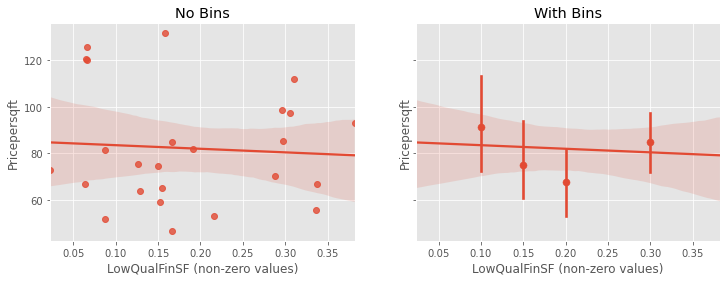

In [76]:
# Plot LowQualFinSF scatter charts    
priceplots('LowQualFinSF',[0.1,0.15,0.2,0.25,0.3])
# Only 24 datapoints so very sparse variable, information likely to be captured in OverallQuality - so drop feature

In [77]:
# Only 24 datapoints so very sparse variable, information likely to be captured in OverallQuality - so drop feature
# since sparsity doesn't help create any meaningful information
housing.drop('LowQualFinSF', axis=1, inplace=True)

In [78]:
basevar = ['TotalBsmtSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF']
housing[basevar]

TotalBsmtSF  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF
0        0.500585    0.412865    0.000000   0.087719
1        1.000000    0.774960    0.000000   0.225040
2        0.515118    0.272116    0.000000   0.243001
3        0.440303    0.125801    0.000000   0.314502
4        0.520928    0.297998    0.000000   0.222930
...           ...         ...         ...        ...
1454     1.000000    0.335790    0.000000   0.664210
1455     0.578628    0.000000    0.000000   0.578628
1456     0.743849    0.381090    0.078630   0.284129
1457     0.492308    0.117521    0.000000   0.374786
1458     1.000000    0.045455    0.954545   0.000000

[1433 rows x 4 columns]

In [79]:
# Drop BsmtFinSF1 and 2 since duplicate information leading to perfect multicollinearity. Also drop FinType1 and FinType2
# More important to distinguish between Total basement size and how much is unfinished.
housing.drop('BsmtFinSF1', axis=1, inplace=True)
housing.drop('BsmtFinSF2', axis=1, inplace=True)
housing.drop('BsmtFinType1', axis=1, inplace=True)
housing.drop('BsmtFinType2', axis=1, inplace=True)

In [80]:
basevar = ['BsmtQual', 'BsmtCond', 'BsmtExposure']
for var in basevar:
    print(housing[var].value_counts())

TA    633
Gd    609
Ex    120
N      36
Fa     35
Name: BsmtQual, dtype: int64
TA    1285
Gd      65
Fa      45
N       36
Po       2
Name: BsmtCond, dtype: int64
No    944
Av    217
Gd    123
Mn    112
N      37
Name: BsmtExposure, dtype: int64


In [81]:
# Data error with BsmtExposure since have 37 with no basement vs 36 from other 2 variables
basevar = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'TotalBsmtSF']
housing.loc[(housing.BsmtExposure == 'N') & (housing.BsmtCond != 'N'),'BsmtExposure'] = 'No'

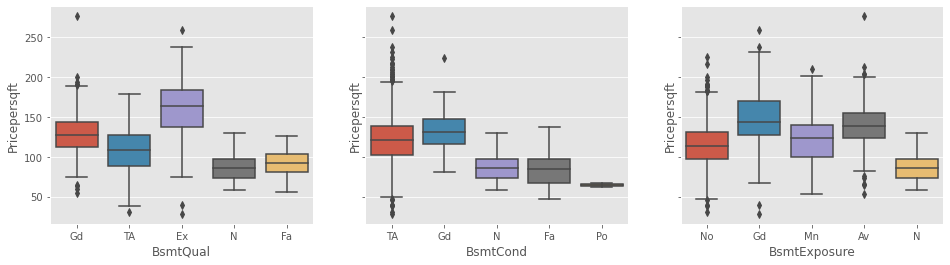

In [82]:
# Basement variables
fig, ax = plt.subplots(figsize=(16, 4), ncols=3, sharex=False, sharey=True)
sns.boxplot(data=housing, x='BsmtQual', y='Pricepersqft', ax=ax[0])
sns.boxplot(data=housing, x='BsmtCond', y='Pricepersqft', ax=ax[1])
sns.boxplot(data=housing, x='BsmtExposure', y='Pricepersqft', ax=ax[2])

In [83]:
# Consolidate basement quality into 3 catgories
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val == 'Fa':
        return 'N'
    if val == 'Gd':
        return 'TA'
    else: return val
housing['BsmtQual'] = housing['BsmtQual'].apply(categorize)
housing['BsmtQual'].value_counts()

TA    1242
Ex     120
N       71
Name: BsmtQual, dtype: int64

In [84]:
def run_mlr(varlis):
    """
    Function to run all combinations of linear regressions of given list of variables varlis
    """
    for var in varlis:
        target = housing.Pricepersqft
        if housing[var].dtype == 'object':
            x = pd.get_dummies(housing[var], columns=var, prefix=var, drop_first=True)
        else: x = housing[var]
        model = sm.OLS(target, x)
        results = model.fit()
        print(results.summary())
    x = pd.get_dummies(housing[varlis], columns=varlis, prefix=varlis, drop_first=True)
    model = sm.OLS(target, x)
    results = model.fit()
    print(results.summary())

In [85]:
var = ['BsmtUnfSF', 'TotalBsmtSF', 'BsmtQual', 'BsmtCond', 'BsmtExposure']
run_mlr(var)

                                 OLS Regression Results                                
Dep. Variable:           Pricepersqft   R-squared (uncentered):                   0.601
Model:                            OLS   Adj. R-squared (uncentered):              0.600
Method:                 Least Squares   F-statistic:                              2153.
Date:                Sun, 07 Feb 2021   Prob (F-statistic):                   1.13e-287
Time:                        15:42:25   Log-Likelihood:                         -8287.7
No. Observations:                1433   AIC:                                  1.658e+04
Df Residuals:                    1432   BIC:                                  1.658e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

                            OLS Regression Results                            
Dep. Variable:           Pricepersqft   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     2.276
Date:                Sun, 07 Feb 2021   Prob (F-statistic):           1.14e-11
Time:                        15:42:28   Log-Likelihood:                -4973.0
No. Observations:                1433   AIC:                         1.244e+04
Df Residuals:                     188   BIC:                         1.899e+04
Df Model:                        1244                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
BsmtUnfSF_

In [86]:
basevar = ['BsmtCond', 'BsmtExposure']
housing.drop(basevar, axis=1, inplace=True)

In [87]:
# BsmtCond and BsmtExposure sound like important variables but what really matters is size, quality and 
# how much is still unfinished.

In [88]:
#Explore Garage features
grgvar = ['GarageType', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive']
housing[grgvar]

GarageType GarageFinish  GarageCars  GarageArea GarageQual GarageCond  \
0        Attchd          RFn           2    0.320468         TA         TA   
1        Attchd          RFn           2    0.364501         TA         TA   
2        Attchd          RFn           2    0.340426         TA         TA   
3        Detchd          Unf           3    0.373908         TA         TA   
4        Attchd          RFn           3    0.380346         TA         TA   
...         ...          ...         ...         ...        ...        ...   
1454     Attchd          RFn           2    0.327600         TA         TA   
1455     Attchd          RFn           2    0.279296         TA         TA   
1456     Attchd          Unf           2    0.241196         TA         TA   
1457     Attchd          RFn           1    0.107692         TA         TA   
1458     Attchd          Unf           1    0.222635         TA         TA   

     PavedDrive  
0             Y  
1             Y  
2             Y  
3             Y  
4             Y  
...         ...  
1454          Y  
1455          Y  
1456          Y  
1457          Y  
1458          Y  

[1433 rows x 7 columns]

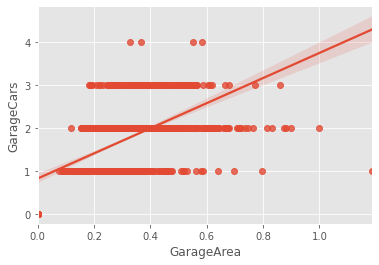

In [89]:
sns.regplot(data=housing, x='GarageArea', y='GarageCars')

In [90]:
# Drop GarageArea because information contained in GarageCars. People measure garages in number of cars more than area.
housing.drop('GarageArea', axis=1, inplace=True)

In [91]:
grgvar = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive']
for var in grgvar:
    print(housing[var].value_counts())

Attchd     851
Detchd     384
BuiltIn     87
N           79
Basment     19
CarPort      9
2Types       4
Name: GarageType, dtype: int64
Unf    595
RFn    415
Fin    344
N       79
Name: GarageFinish, dtype: int64
TA    1286
N       79
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64
TA    1301
N       79
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64
Y    1320
N      84
P      29
Name: PavedDrive, dtype: int64


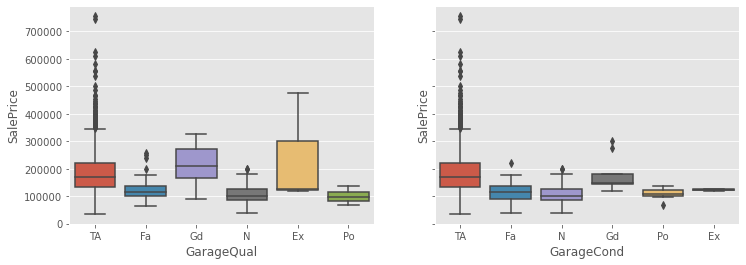

In [92]:
fig, ax = plt.subplots(figsize=(12, 4), ncols=2, sharex=False, sharey=True)
sns.boxplot(data=housing, x='GarageQual', y='SalePrice', ax=ax[0])
sns.boxplot(data=housing, x='GarageCond', y='SalePrice', ax=ax[1])

In [93]:
# Consolidate GarageCond into 3 catgories
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val == 'Fa':
        return 'N'
    if val == 'Po':
        return 'N'
    if val == 'Ex':
        return 'Gd'
    else: return val
housing['GarageCond'] = housing['GarageCond'].apply(categorize)
housing['GarageCond'].value_counts()

TA    1301
N      121
Gd      11
Name: GarageCond, dtype: int64

In [94]:
# Consolidate garage quality into 3 catgories
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val == 'Fa':
        return 'N'
    if val == 'Po':
        return 'N'
    if val == 'Ex':
        return 'Gd'
    else: return val
housing['GarageQual'] = housing['GarageQual'].apply(categorize)
housing['GarageQual'].value_counts()

TA    1286
N      130
Gd      17
Name: GarageQual, dtype: int64

In [95]:
# Consolidate garage type into 3 catgories
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val == 'N':
        return 'Other'
    if val == 'Basment':
        return 'Other'
    if val == 'CarPort':
        return 'Other'
    if val == '2Types':
        return 'Other'
    else: return val
housing['GarageType'] = housing['GarageType'].apply(categorize)
housing['GarageType'].value_counts()

Attchd     851
Detchd     384
Other      111
BuiltIn     87
Name: GarageType, dtype: int64

In [96]:
var = ['GarageQual', 'GarageCond']
run_mlr(var)

                                 OLS Regression Results                                
Dep. Variable:           Pricepersqft   R-squared (uncentered):                   0.930
Model:                            OLS   Adj. R-squared (uncentered):              0.930
Method:                 Least Squares   F-statistic:                              9465.
Date:                Sun, 07 Feb 2021   Prob (F-statistic):                        0.00
Time:                        15:42:29   Log-Likelihood:                         -7042.8
No. Observations:                1433   AIC:                                  1.409e+04
Df Residuals:                    1431   BIC:                                  1.410e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [97]:
# Both are good predictors at 94% and including both creates multicollinearity for no increase in explain.
# Drop Garage quality, because some will be captured in Overall quality and current condition is probably what matters.
housing.drop('GarageQual', axis=1, inplace=True)

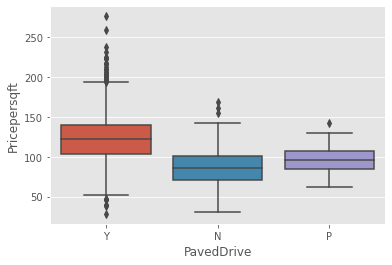

In [98]:
# Check difference between partial or no paved driveways
sns.boxplot(data=housing, x='PavedDrive', y='Pricepersqft')

In [99]:
var = ['PavedDrive']
x = pd.get_dummies(housing[var], columns=var, prefix=var, drop_first=True)
target = housing.Pricepersqft
model = sm.OLS(target, x)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:           Pricepersqft   R-squared (uncentered):                   0.912
Model:                            OLS   Adj. R-squared (uncentered):              0.912
Method:                 Least Squares   F-statistic:                              7401.
Date:                Sun, 07 Feb 2021   Prob (F-statistic):                        0.00
Time:                        15:42:30   Log-Likelihood:                         -7205.1
No. Observations:                1433   AIC:                                  1.441e+04
Df Residuals:                    1431   BIC:                                  1.442e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [100]:
bedvar = ['1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath']
housing[bedvar]

1stFlrSF  2ndFlrSF  GrLivArea  FullBath  HalfBath
0     0.500585  0.499415       1710         2         1
1     1.000000  0.000000       1262         2         0
2     0.515118  0.484882       1786         2         1
3     0.559697  0.440303       1717         1         0
4     0.520928  0.479072       2198         2         1
...        ...       ...        ...       ...       ...
1454  1.000000  0.000000       1221         2         0
1455  0.578628  0.421372       1647         2         1
1456  1.000000  0.000000       2073         2         0
1457  0.507692  0.492308       2340         2         0
1458  1.000000  0.000000       1078         1         0

[1433 rows x 5 columns]

In [101]:
# Drop 1stFlrSF since info already contained in GrLivingArea 
housing.drop('1stFlrSF', axis=1, inplace=True)

In [102]:
# Total rooms above grade does not include bathrooms but includes basement bedrooms and other living rooms
# Create a new variable as difference between TotRmsAbvGrd less BedroomAbvGr less KitchenAbvGr
housing['OtherRmsAbvGrd'] = housing['TotRmsAbvGrd'] - housing['BedroomAbvGr']
# Check no negative rooms!
housing[housing['OtherRmsAbvGrd'] < 0]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotArea, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 2ndFlrSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageCond, PavedDrive, WoodDeck, OpenPorch, EnclosedPorch, ScreenPorch, Fence, Shed, MoSold, YrSold, SaleType, SaleCondition, SalePrice, Pricepersqft, OtherRmsAbvGrd]
Index: []

[0 rows x 67 columns]

In [103]:
var = ['OtherRmsAbvGrd', 'BedroomAbvGr', 'KitchenAbvGr', 'FullBath', 'HalfBath']
x = housing[var]
run_mlr(var)

                                 OLS Regression Results                                
Dep. Variable:           Pricepersqft   R-squared (uncentered):                   0.842
Model:                            OLS   Adj. R-squared (uncentered):              0.842
Method:                 Least Squares   F-statistic:                              7614.
Date:                Sun, 07 Feb 2021   Prob (F-statistic):                        0.00
Time:                        15:42:30   Log-Likelihood:                         -7624.6
No. Observations:                1433   AIC:                                  1.525e+04
Df Residuals:                    1432   BIC:                                  1.526e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [104]:
# All room variables are statistically significant except Halfbath
housing.drop('TotRmsAbvGrd', axis=1, inplace=True)

In [105]:
# Fireplace, heating, electrical, central air
var = ['Fireplaces', 'FireplaceQu', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical']
housing[var]
run_mlr(var)

                                 OLS Regression Results                                
Dep. Variable:           Pricepersqft   R-squared (uncentered):                   0.480
Model:                            OLS   Adj. R-squared (uncentered):              0.479
Method:                 Least Squares   F-statistic:                              1321.
Date:                Sun, 07 Feb 2021   Prob (F-statistic):                   1.92e-205
Time:                        15:42:30   Log-Likelihood:                         -8477.0
No. Observations:                1433   AIC:                                  1.696e+04
Df Residuals:                    1432   BIC:                                  1.696e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

                            OLS Regression Results                            
Dep. Variable:           Pricepersqft   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     20.54
Date:                Sun, 07 Feb 2021   Prob (F-statistic):           2.10e-67
Time:                        15:42:30   Log-Likelihood:                -6771.0
No. Observations:                1433   AIC:                         1.359e+04
Df Residuals:                    1411   BIC:                         1.370e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Fireplaces_1       131.5291     28.325  

In [106]:
var = ['FireplaceQu', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical']
for v in var:
       print(housing[v].value_counts())

N     679
Gd    375
TA    303
Fa     32
Ex     24
Po     20
Name: FireplaceQu, dtype: int64
GasA     1402
GasW       17
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64
Ex    732
TA    418
Gd    235
Fa     47
Po      1
Name: HeatingQC, dtype: int64
Y    1341
N      92
Name: CentralAir, dtype: int64
SBrkr    1309
FuseA      92
FuseF      27
FuseP       3
Mix         2
Name: Electrical, dtype: int64


In [107]:
# Heating, CentralAir and Electrical will be too sparse after dummification and removing the category with largest values
# Drop those variables
var = ['Heating', 'CentralAir', 'Electrical']
housing.drop(var, axis=1, inplace=True)

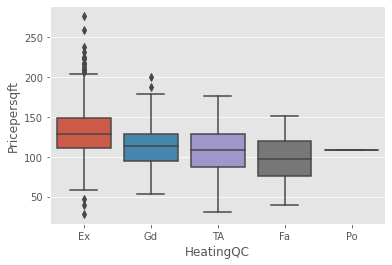

In [108]:
# Consolidate poor heating
sns.boxplot(data=housing, x='HeatingQC', y='Pricepersqft')

In [109]:
# Consolidate HeatingQC Fair and Poor into Avg/Typical
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val == 'Po':
        return 'TA'
    if val == 'Fa':
        return 'TA'
    else: return val
housing['HeatingQC'] = housing['HeatingQC'].apply(categorize)
housing['HeatingQC'].value_counts()

Ex    732
TA    466
Gd    235
Name: HeatingQC, dtype: int64

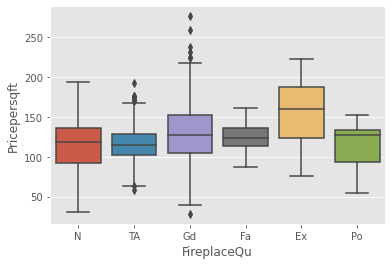

In [110]:
# Electrical appears to not be statistically significant feature
sns.boxplot(data=housing, x='FireplaceQu', y='Pricepersqft')

In [111]:
# Simplify FireplaceQu to consolidate N, TA, Fa and Po
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val == 'Po':
        return 'N'
    if val == 'TA':
        return 'N'
    if val == 'Fa':
        return 'N'
    else: return val
housing['FireplaceQu'] = housing['FireplaceQu'].apply(categorize)
housing['FireplaceQu'].value_counts()

N     1034
Gd     375
Ex      24
Name: FireplaceQu, dtype: int64

In [112]:
# Look at Yearbuilt, Year remodel added, YearGaragebuilt
var = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
run_mlr(var)


                                 OLS Regression Results                                
Dep. Variable:           Pricepersqft   R-squared (uncentered):                   0.941
Model:                            OLS   Adj. R-squared (uncentered):              0.941
Method:                 Least Squares   F-statistic:                          2.291e+04
Date:                Sun, 07 Feb 2021   Prob (F-statistic):                        0.00
Time:                        15:42:30   Log-Likelihood:                         -6915.3
No. Observations:                1433   AIC:                                  1.383e+04
Df Residuals:                    1432   BIC:                                  1.384e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

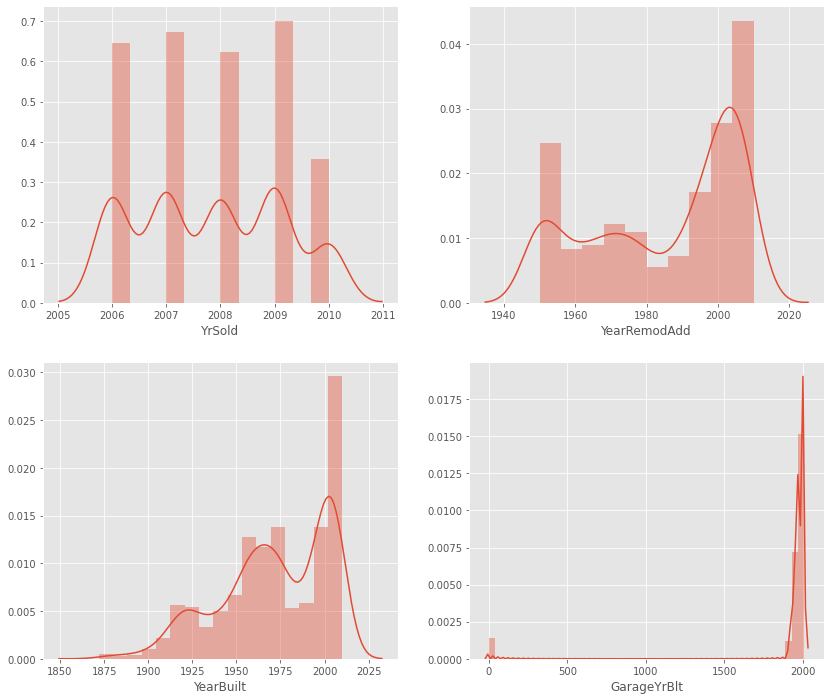

In [113]:
fig, ax = plt.subplots(figsize=(14, 12), ncols=2, nrows=2, sharex=False, sharey=False)
sns.distplot(housing['YrSold'], ax=ax[0,0])
sns.distplot(housing['YearBuilt'], ax=ax[1,0])
sns.distplot(housing['YearRemodAdd'], ax=ax[0,1])
sns.distplot(housing['GarageYrBlt'], ax=ax[1,1])

In [114]:
# GarageYrBlt zeros are creating a problem, if zero then impute them to be the Yearbuilt
housing.loc[housing['GarageYrBlt'] == 0, 'GarageYrBlt'] = housing.loc[housing['GarageYrBlt'] == 0, 'YearBuilt']

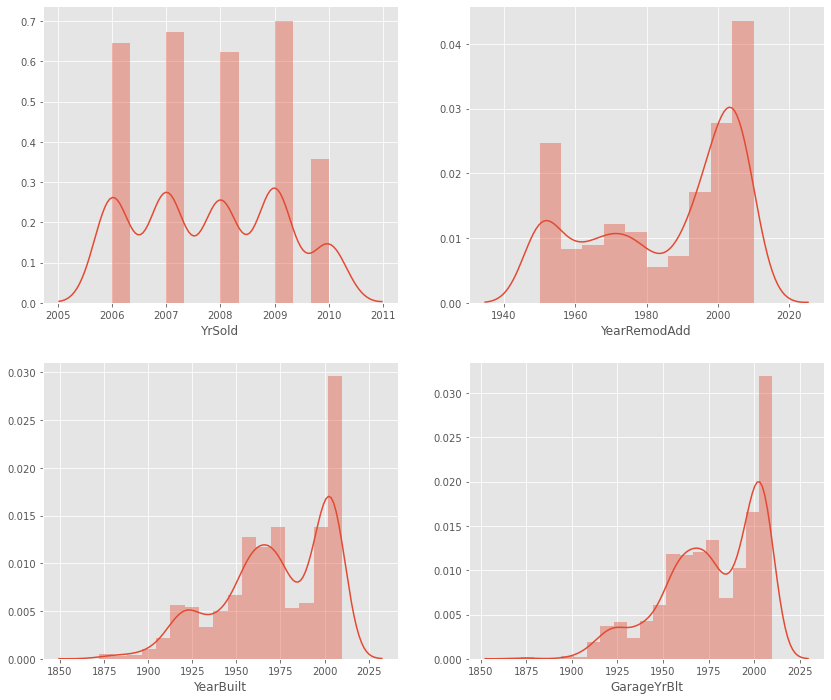

In [115]:
fig, ax = plt.subplots(figsize=(14, 12), ncols=2, nrows=2, sharex=False, sharey=False)
sns.distplot(housing['YrSold'], ax=ax[0,0])
sns.distplot(housing['YearBuilt'], ax=ax[1,0])
sns.distplot(housing['YearRemodAdd'], ax=ax[0,1])
sns.distplot(housing['GarageYrBlt'], ax=ax[1,1])

In [116]:
# Convert year variables into age for benefits of standardisation and interpretability
housing['HouseAge'] = housing['YrSold'] - housing['YearBuilt']
housing['RemodAge'] = housing['YrSold'] - housing['YearRemodAdd']
housing['GarageAge'] = housing['YrSold'] - housing['GarageYrBlt']

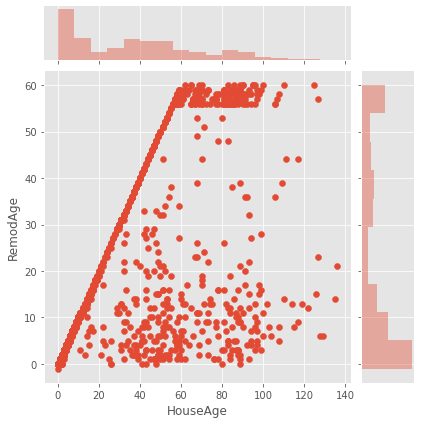

In [117]:
# Check joinplots
sns.jointplot(housing['HouseAge'], housing['RemodAge'])

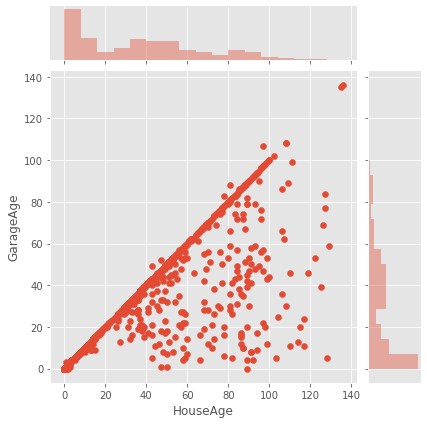

In [118]:
# Check joinplots
sns.jointplot(housing['HouseAge'], housing['GarageAge'])

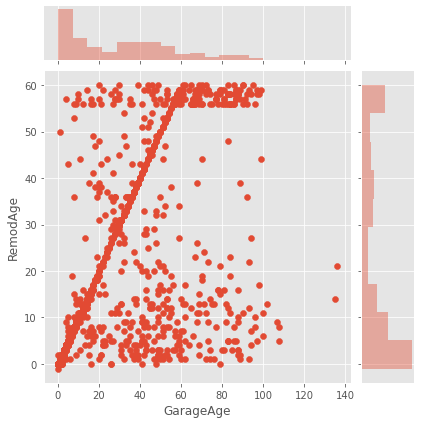

In [119]:
# Check joinplots
sns.jointplot(housing['GarageAge'], housing['RemodAge'])

In [120]:
# Drop original 4 year variables
var = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
housing.drop(var, axis=1, inplace=True)

In [121]:
# Drop GarageAge since Remodel captures this and more
housing.drop('GarageAge', axis=1, inplace=True)

In [122]:
var = ['MoSold', 'SaleType', 'SaleCondition']
run_mlr(var)

                                 OLS Regression Results                                
Dep. Variable:           Pricepersqft   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.900
Method:                 Least Squares   F-statistic:                              1177.
Date:                Sun, 07 Feb 2021   Prob (F-statistic):                        0.00
Time:                        15:42:33   Log-Likelihood:                         -7287.8
No. Observations:                1433   AIC:                                  1.460e+04
Df Residuals:                    1422   BIC:                                  1.466e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

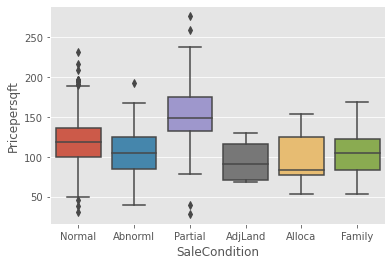

In [123]:
# SaleCondition doesn't appears statistically significant
sns.boxplot(data=housing, x='SaleCondition', y='Pricepersqft')

In [124]:
# Consolidate SaleCondition for low volume catgories
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val == 'Family':
        return 'Other'
    if val == 'Alloca':
        return 'Other'
    if val == 'AdjLand':
        return 'Other'
    else: return val
housing['SaleCondition'] = housing['SaleCondition'].apply(categorize)
housing['SaleCondition'].value_counts()

Normal     1172
Partial     125
Abnorml     100
Other        36
Name: SaleCondition, dtype: int64

In [125]:
housing['SaleType'].value_counts()

WD       1241
New       122
COD        43
ConLD       8
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [126]:
# Consolidate SaleType into 3  categories
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val == 'COD':
        return 'Other'
    if val == 'ConLD':
        return 'Other'
    if val == 'ConLI':
        return 'Other'
    if val == 'ConLw':
        return 'Other'
    if val == 'CWD':
        return 'Other'
    if val == 'Oth':
        return 'Other'
    if val == 'Con':
        return 'Other'
    else: return val
housing['SaleType'] = housing['SaleType'].apply(categorize)
housing['SaleType'].value_counts()

WD       1241
New       122
Other      70
Name: SaleType, dtype: int64

In [127]:
# Aggregating prices to identify monthly seasonality
colFun = {'Pricepersqft':['count', 'mean']}
analysis=housing.groupby('MoSold').agg(colFun)
analysis

Pricepersqft            
              count        mean
MoSold                         
1                56  119.889399
10               88  122.020740
11               77  119.368792
12               58  124.125260
2                51  124.549393
3               104  119.774513
4               138  117.820257
5               203  121.604656
6               245  118.965100
7               232  120.756943
8               119  120.388801
9                62  120.529100

In [128]:
# Consolidate Months into seasons
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val in ['12','1','2']:
        return 'Winter'
    if val in ['3','4','5']:
        return 'Spring'
    if val in ['6','7','8']:
        return 'Summer'
    if val in ['9','10','11']:
        return 'Fall'
housing['MoSold'] = housing['MoSold'].apply(categorize)
housing['MoSold'].value_counts()

Summer    596
Spring    445
Fall      227
Winter    165
Name: MoSold, dtype: int64

In [129]:
# Aggregating prices to identify monthly seasonality
colFun = {'Pricepersqft':['count', 'mean']}
analysis=housing.groupby('MoSold').agg(colFun)
analysis

Pricepersqft            
              count        mean
MoSold                         
Fall            227  120.713772
Spring          445  120.003348
Summer          596  119.946859
Winter          165  122.818730

In [130]:
# Rename month variable to season
housing.rename(columns={'MoSold': 'Season'}, inplace=True)

In [131]:
# Variables associated with external features of house
var = ['Fence', 'Functional', 'Foundation', 'ExterCond', 'ExterQual', 'Exterior2nd', 'Exterior1st', 'RoofMatl', 'RoofStyle']
run_mlr(var)

                                 OLS Regression Results                                
Dep. Variable:           Pricepersqft   R-squared (uncentered):                   0.903
Model:                            OLS   Adj. R-squared (uncentered):              0.903
Method:                 Least Squares   F-statistic:                              3341.
Date:                Sun, 07 Feb 2021   Prob (F-statistic):                        0.00
Time:                        15:42:33   Log-Likelihood:                         -7270.6
No. Observations:                1433   AIC:                                  1.455e+04
Df Residuals:                    1429   BIC:                                  1.457e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [132]:
# Simplify Functional to 4 categories
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val == 'Sev':
        return 'Maj'
    elif val == 'Maj1':
        return 'Maj'
    elif val == 'Maj2':
        return 'Maj'
    elif val == 'Min1':
        return 'Min'
    elif val == 'Min2':
        return 'Min'
    elif val == 'Mod':
        return 'Mod'
    elif val == 'Typ':
        return 'Typ'
    else: return val
housing['Functional'] = housing['Functional'].apply(categorize)
housing['Functional'].value_counts()

Typ    1337
Min      63
Maj      20
Mod      13
Name: Functional, dtype: int64

In [133]:
# Lots of variables that don't really have explanatory power and also those that contribute to multi-collinearity
var = ['Fence', 'Foundation', 'Exterior2nd', 'Exterior1st', 'RoofMatl', 'RoofStyle']
housing.drop(var, axis=1, inplace=True)

In [134]:
# Variables associated with external features of house
var = ['Functional', 'ExterCond', 'ExterQual', 'MasVnrType', 'MasVnrArea']
for v in var:
    print(housing[v].value_counts())

Typ    1337
Min      63
Maj      20
Mod      13
Name: Functional, dtype: int64
TA    1259
Gd     143
Fa      27
Ex       3
Po       1
Name: ExterCond, dtype: int64
TA    886
Gd    483
Ex     52
Fa     12
Name: ExterQual, dtype: int64
None       852
BrkFace    442
Stone      126
BrkCmn      13
Name: MasVnrType, dtype: int64
0.000000    850
0.200472      4
0.029257      3
0.065191      3
0.199292      3
           ... 
0.310935      1
0.079952      1
0.036903      1
0.067265      1
0.098784      1
Name: MasVnrArea, Length: 567, dtype: int64


In [135]:
# Consolidate ExterCond to 3 categories
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val == 'Po':
        return 'Fa'
    elif val == 'Ex':
        return 'Gd'
    else: return val
housing['ExterCond'] = housing['ExterCond'].apply(categorize)
housing['ExterCond'].value_counts()

TA    1259
Gd     146
Fa      28
Name: ExterCond, dtype: int64

In [136]:
# Consolidate ExterQual to 3 categories
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val == 'Fa':
        return 'TA'
    else: return val
housing['ExterQual'] = housing['ExterQual'].apply(categorize)
housing['ExterQual'].value_counts()

TA    898
Gd    483
Ex     52
Name: ExterQual, dtype: int64

In [137]:
# Variables associated with Masonry veneer
var = ['MasVnrType', 'MasVnrArea']

var = ['MasVnrArea']
x = housing[var]
model = sm.OLS(target, x)
results = model.fit()
print(results.summary())

var = ['MasVnrType']
x = pd.get_dummies(housing[var], columns=var, prefix=var, drop_first=True)
model = sm.OLS(target, x)
results = model.fit()
print(results.summary())

x['MasVnrArea'] = housing['MasVnrArea']
model = sm.OLS(target, x)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:           Pricepersqft   R-squared (uncentered):                   0.302
Model:                            OLS   Adj. R-squared (uncentered):              0.302
Method:                 Least Squares   F-statistic:                              619.5
Date:                Sun, 07 Feb 2021   Prob (F-statistic):                   6.13e-114
Time:                        15:42:33   Log-Likelihood:                         -8687.7
No. Observations:                1433   AIC:                                  1.738e+04
Df Residuals:                    1432   BIC:                                  1.738e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [138]:
# Drop MasVnrArea since quality has more explanatory power
housing.drop('MasVnrArea', axis=1, inplace=True)

In [139]:
# Variables associated with Overall
var = ['OverallQual', 'OverallCond']
run_mlr(var)

                                 OLS Regression Results                                
Dep. Variable:           Pricepersqft   R-squared (uncentered):                   0.942
Model:                            OLS   Adj. R-squared (uncentered):              0.942
Method:                 Least Squares   F-statistic:                          2.322e+04
Date:                Sun, 07 Feb 2021   Prob (F-statistic):                        0.00
Time:                        15:42:33   Log-Likelihood:                         -6906.3
No. Observations:                1433   AIC:                                  1.381e+04
Df Residuals:                    1432   BIC:                                  1.382e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [140]:
# Overall condition and quality both significant so keep both

In [141]:
# Variables relating to land and outside
var = ['LandSlope', 'Utilities', 'LotShape', 'Condition2', 'LotConfig', 'LandContour', 'Alley']
run_mlr(var)

                                 OLS Regression Results                                
Dep. Variable:           Pricepersqft   R-squared (uncentered):                   0.040
Model:                            OLS   Adj. R-squared (uncentered):              0.038
Method:                 Least Squares   F-statistic:                              29.47
Date:                Sun, 07 Feb 2021   Prob (F-statistic):                    2.87e-13
Time:                        15:42:33   Log-Likelihood:                         -8916.3
No. Observations:                1433   AIC:                                  1.784e+04
Df Residuals:                    1431   BIC:                                  1.785e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [142]:
# Drop Landslope, Utilities and Lotshape since no explanatory power
var = ['LandSlope', 'Utilities', 'LotShape']
housing.drop(var, axis=1, inplace=True)

In [143]:
var = ['Condition2', 'LotConfig', 'LandContour', 'Alley']
for v in var:
    print(housing[v].value_counts())

Norm      1419
Feedr        6
PosN         2
Artery       2
RRNn         2
RRAn         1
PosA         1
Name: Condition2, dtype: int64
Inside     1035
Corner      260
CulDSac      87
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Lvl    1301
Bnk      61
HLS      47
Low      24
Name: LandContour, dtype: int64
N       1342
Grvl      50
Pave      41
Name: Alley, dtype: int64


In [144]:
#These variables have low explanatory power and likely to just contribute to multi-collinearity
var = ['Condition2', 'Alley', 'LandContour', 'LotConfig']
housing.drop(var, axis=1, inplace=True)

In [145]:
housing['Condition1'].value_counts()

Norm      1237
Feedr       79
Artery      47
RRAn        25
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [146]:
# Consolidate Condition1 for railroad variables and positive feature variables
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val == 'RRAn':
        return 'RR'
    if val == 'RRNn':
        return 'RR'
    if val == 'RRNe':
        return 'RR'
    if val == 'RRAe':
        return 'RR'
    if val == 'PosN':
        return 'Pos'
    if val == 'PosA':
        return 'Pos'
    else: return val
housing['Condition1'] = housing['Condition1'].apply(categorize)
housing['Condition1'].value_counts()

Norm      1237
Feedr       79
Artery      47
RR          43
Pos         27
Name: Condition1, dtype: int64

In [147]:
# Issues with HouseStyle categories, perhaps consider consolidating them
housing.HouseStyle.value_counts()

1Story    706
2Story    442
1.5Fin    151
SLvl       64
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

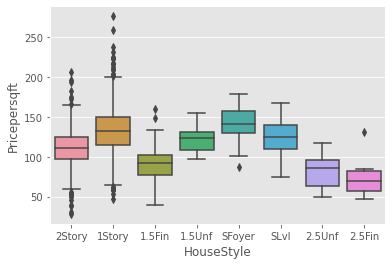

In [148]:
sns.boxplot(data=housing,x='HouseStyle',y='Pricepersqft')
# So much variablity in 1 and 2 story so consilidate with 1.5 and 2.5 stories

In [149]:
# Overall value and quality will take into account if a house is unfinished etc. This feature is combining infomation
# like if a house is finished or unfinished.
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val == '1.5Fin':
        return '1.5Story'
    elif val == '1.5Unf':
        return '1.5Story'
    elif val == '2.5Unf':
        return '2.5Story'
    elif val == '2.5Fin':
        return '2.5Story'
    elif val == 'SLvl':
        return 'Other'
    elif val == 'SFoyer':
        return 'Other'
    else: return val
housing['HouseStyle'] = housing['HouseStyle'].apply(categorize)
housing['HouseStyle'].value_counts()

1Story      706
2Story      442
1.5Story    165
Other       101
2.5Story     19
Name: HouseStyle, dtype: int64

In [150]:
#Explore neighbourhood and zoning
var = ['HouseStyle', 'BldgType', 'MSSubClass', 'MSZoning', 'Neighborhood']
run_mlr(var)

                                 OLS Regression Results                                
Dep. Variable:           Pricepersqft   R-squared (uncentered):                   0.886
Model:                            OLS   Adj. R-squared (uncentered):              0.885
Method:                 Least Squares   F-statistic:                              2770.
Date:                Sun, 07 Feb 2021   Prob (F-statistic):                        0.00
Time:                        15:42:34   Log-Likelihood:                         -7390.9
No. Observations:                1433   AIC:                                  1.479e+04
Df Residuals:                    1429   BIC:                                  1.481e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [151]:
# Building type is explained by MSSubClass and house style so drop it
# MSZoning is explained by all the other variables, like neighbourhood, house-type, size etc
# Housestyle is explained by MSSubCLass so drop it
var = ['BldgType','MSZoning', 'HouseStyle']
housing.drop(var, axis=1, inplace=True)

In [152]:
housing.MSSubClass.value_counts()

20     521
60     297
50     143
120     87
30      67
160     63
70      60
80      57
90      51
190     26
85      20
75      16
45      12
180     10
40       3
Name: MSSubClass, dtype: int64

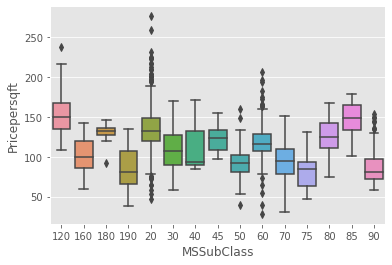

In [153]:
sns.boxplot(data=housing, x='MSSubClass', y='Pricepersqft')

In [154]:
# MSSubClass convert from ordinal categorical to nominal categorical
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val == '20':
        return 'A1'
    elif val == '30':
        return 'A2'
    elif val == '40':
        return 'A3'
    elif val == '120':
        return 'A4'
    elif val == '45':
        return 'B1'
    elif val == '50':
        return 'B2'
    elif val == '150':
        return 'B3'
    elif val == '60':
        return 'C1'
    elif val == '70':
        return 'C2'
    elif val == '160':
        return 'C3'
    elif val == '75':
        return 'D1'
    elif val == '80':
        return 'E1'
    elif val == '85':
        return 'E2'
    elif val == '180':
        return 'E3'
    elif val == '90':
        return 'F1'
    elif val == '190':
        return 'F2'
    else: return val
housing['MSSubClass'] = housing['MSSubClass'].apply(categorize)
housing['MSSubClass'].value_counts()

A1    521
C1    297
B2    143
A4     87
A2     67
C3     63
C2     60
E1     57
F1     51
F2     26
E2     20
D1     16
B1     12
E3     10
A3      3
Name: MSSubClass, dtype: int64

In [155]:
# Bathroom consolidation (weight according to perceived importance)
housing['AllBath'] = 2*housing['FullBath'] + 1.5*housing['HalfBath'] + 1*housing['BsmtFullBath'] + 0.5*housing['BsmtHalfBath']
var = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'AllBath']
run_mlr(var)

x = housing[var]
model = sm.OLS(target, x)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:           Pricepersqft   R-squared (uncentered):                   0.459
Model:                            OLS   Adj. R-squared (uncentered):              0.459
Method:                 Least Squares   F-statistic:                              1215.
Date:                Sun, 07 Feb 2021   Prob (F-statistic):                   2.71e-193
Time:                        15:42:34   Log-Likelihood:                         -8505.0
No. Observations:                1433   AIC:                                  1.701e+04
Df Residuals:                    1432   BIC:                                  1.702e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [156]:
# Drop other housing variables and consolidate into 1 bathroom variable
var = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']
housing.drop(var, axis=1, inplace=True)

# Done with feature assessment, ready to use one-hot encoding and modelling

In [157]:
# Check scores after feature engineering, pretty similar to before so have not lost any information
run_lasso(housing)

The best score is 0.7461
The training error is 0.2025
The testing error is 0.1938


## One-hot encoding of categorical variables
1. Before one-hot encoding, scale the numerical variables because we will apply PCA
2. Use one-hot encoding to convert categorical features into numerical variables dropping one category to prevent multicollinearity
3. 37 features will explode to about 102, which is still manageable
4. Data will be ready for PCA thereafter

In [158]:
# Pick up from here
# Variables with missing values ranked by percentage missing
summarydf = summarise_data(housing, 'Pricepersqft')
summarydf

Predictor  ValueCount  MissingCount  TotalCount  MissingPercent  \
0               Id        1433             0        1433             0.0   
1       MSSubClass        1433             0        1433             0.0   
2          LotArea        1433             0        1433             0.0   
3     Neighborhood        1433             0        1433             0.0   
4       Condition1        1433             0        1433             0.0   
5      OverallQual        1433             0        1433             0.0   
6      OverallCond        1433             0        1433             0.0   
7       MasVnrType        1433             0        1433             0.0   
8        ExterQual        1433             0        1433             0.0   
9        ExterCond        1433             0        1433             0.0   
10        BsmtQual        1433             0        1433             0.0   
11       BsmtUnfSF        1433             0        1433             0.0   
12     TotalBsmtSF        1433             0        1433             0.0   
13       HeatingQC        1433             0        1433             0.0   
14        2ndFlrSF        1433             0        1433             0.0   
15       GrLivArea        1433             0        1433             0.0   
16    BedroomAbvGr        1433             0        1433             0.0   
17    KitchenAbvGr        1433             0        1433             0.0   
18     KitchenQual        1433             0        1433             0.0   
19      Functional        1433             0        1433             0.0   
20      Fireplaces        1433             0        1433             0.0   
21     FireplaceQu        1433             0        1433             0.0   
22      GarageType        1433             0        1433             0.0   
23    GarageFinish        1433             0        1433             0.0   
24      GarageCars        1433             0        1433             0.0   
25      GarageCond        1433             0        1433             0.0   
26      PavedDrive        1433             0        1433             0.0   
27        WoodDeck        1433             0        1433             0.0   
28       OpenPorch        1433             0        1433             0.0   
29   EnclosedPorch        1433             0        1433             0.0   
30     ScreenPorch        1433             0        1433             0.0   
31            Shed        1433             0        1433             0.0   
32          Season        1433             0        1433             0.0   
33        SaleType        1433             0        1433             0.0   
34   SaleCondition        1433             0        1433             0.0   
35       SalePrice        1433             0        1433             0.0   
36    Pricepersqft        1433             0        1433             0.0   
37  OtherRmsAbvGrd        1433             0        1433             0.0   
38        HouseAge        1433             0        1433             0.0   
39        RemodAge        1433             0        1433             0.0   
40         AllBath        1433             0        1433             0.0   

   VariableType  CountCategories  Skewness  SpearmanCorr  NumOutliers  
0     numerical                0 -0.007966     -0.008816            0  
1   categorical               15  0.000000           NaN            0  
2     numerical                0  0.871710      0.229921           44  
3   categorical               25  0.000000           NaN            0  
4   categorical                5  0.000000           NaN            0  
5     numerical                0  0.210796      0.409675            2  
6     numerical                0  0.687561     -0.002946          124  
7   categorical                4  0.000000           NaN            0  
8   categorical                3  0.000000           NaN            0  
9   categorical                3  0.000000           NaN            0  
10  categorical         

In [159]:
# Store lists of names of numerical and categorical features
mask = summarydf.VariableType == 'categorical'
categorical_vars = list(summarydf.loc[mask, 'Predictor'])
print('The number of categorical variables are: %.0i' %len(categorical_vars))
mask = summarydf.VariableType == 'numerical'
numerical_vars = list(summarydf.loc[mask, 'Predictor'])
print('The number of numerical variables are: %.0i' %len(numerical_vars))

The number of categorical variables are: 23
The number of numerical variables are: 18


In [160]:
# Drop Id and SalePrice, GrLivingArea and Pricepersqft to only leave features/response/independent variables
target = housing.Pricepersqft
dropvar = ['Id', 'SalePrice', 'Pricepersqft', 'GrLivArea']
for v in dropvar:
    numerical_vars.remove(v)
features = housing.drop(dropvar, axis=1)
features[numerical_vars]

LotArea  OverallQual  OverallCond  BsmtUnfSF  TotalBsmtSF  2ndFlrSF  \
0     4.941520            7            5   0.087719     0.500585  0.499415   
1     7.606973            6            8   0.225040     1.000000  0.000000   
2     6.298992            7            5   0.243001     0.515118  0.484882   
3     5.562027            7            5   0.314502     0.440303  0.440303   
4     6.487716            8            5   0.222930     0.520928  0.479072   
...        ...          ...          ...        ...          ...       ...   
1454  6.142506            7            5   0.664210     1.000000  0.000000   
1455  4.806922            6            5   0.578628     0.578628  0.421372   
1456  6.355523            6            6   0.284129     0.743849  0.000000   
1457  3.864103            7            9   0.374786     0.492308  0.492308   
1458  9.013915            5            6   0.000000     1.000000  0.000000   

      BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageCars  OtherRmsAbvGrd  \
0                3             1           0           2               5   
1                3             1           1           2               3   
2                3             1           1           2               3   
3                3             1           1           3               4   
4                4             1           1           3               5   
...            ...           ...         ...         ...             ...   
1454             2             1           0           2               4   
1455             3             1           1           2               4   
1456             3             1           2           2               4   
1457             4             1           2           1               5   
1458             2             1           0           1               3   

      HouseAge  RemodAge  AllBath  
0            5         5      6.5  
1           31        31      4.5  
2            7         6      6.5  
3           91        36      3.0  
4            8         8      6.5  
...        ...       ...      ...  
1454         5         4      5.0  
1455         8         7      5.5  
1456        32        22      5.0  
1457        69         4      4.0  
1458        60        14      3.0  

[1433 rows x 14 columns]

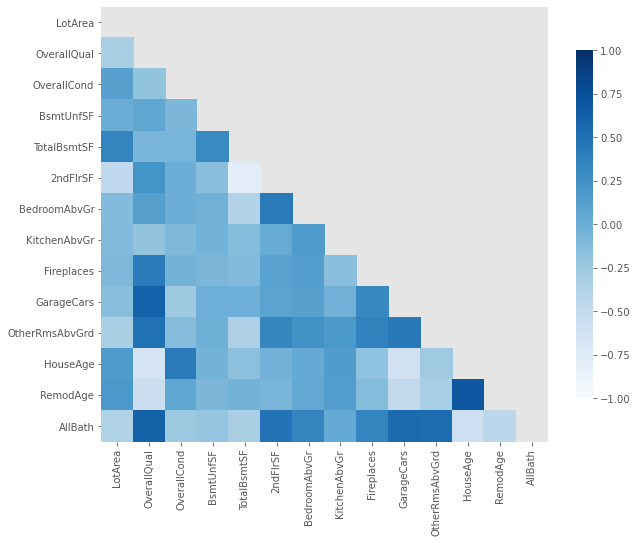

In [161]:
# Check correlation matrix again for multi-collinearity
# Correlation plot of all variables
corr_plot(features, list(features.columns))

In [162]:
# Scale all numerical features by subtracting mean and dividing by std. deviation
scaler = StandardScaler()
features[numerical_vars] = scaler.fit_transform(features[numerical_vars])
features[numerical_vars].mean(axis=0)
features[numerical_vars].std(axis=0)

LotArea           1.000349
OverallQual       1.000349
OverallCond       1.000349
BsmtUnfSF         1.000349
TotalBsmtSF       1.000349
2ndFlrSF          1.000349
BedroomAbvGr      1.000349
KitchenAbvGr      1.000349
Fireplaces        1.000349
GarageCars        1.000349
OtherRmsAbvGrd    1.000349
HouseAge          1.000349
RemodAge          1.000349
AllBath           1.000349
dtype: float64

In [163]:
onehothousing = pd.get_dummies(features, columns=categorical_vars, prefix=categorical_vars, drop_first=True)
onehothousing

LotArea  OverallQual  OverallCond  BsmtUnfSF  TotalBsmtSF  2ndFlrSF  \
0    -0.651880     0.642638    -0.519150  -1.023798    -0.849171  1.364672   
1     0.301052    -0.081910     2.173038  -0.557431     0.985159 -0.853091   
2    -0.166567     0.642638    -0.519150  -0.496431    -0.795793  1.300136   
3    -0.430041     0.642638    -0.519150  -0.253600    -1.070584  1.102171   
4    -0.099096     1.367185    -0.519150  -0.564596    -0.774451  1.274333   
...        ...          ...          ...        ...          ...       ...   
1454 -0.222513     0.642638    -0.519150   0.934076     0.985159 -0.853091   
1455 -0.700001    -0.081910    -0.519150   0.643423    -0.562523  1.018105   
1456 -0.146356    -0.081910     0.378246  -0.356751     0.044329 -0.853091   
1457 -1.037070     0.642638     3.070434  -0.048862    -0.879573  1.333110   
1458  0.804051    -0.806457     0.378246  -1.321710     0.985159 -0.853091   

      BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageCars  ...  ScreenPorch_N  \
0         0.159932     -0.209953   -0.952282    0.315587  ...              1   
1         0.159932     -0.209953    0.621674    0.315587  ...              1   
2         0.159932     -0.209953    0.621674    0.315587  ...              1   
3         0.159932     -0.209953    0.621674    1.657534  ...              1   
4         1.392100     -0.209953    0.621674    1.657534  ...              1   
...            ...           ...         ...         ...  ...            ...   
1454     -1.072235     -0.209953   -0.952282    0.315587  ...              1   
1455      0.159932     -0.209953    0.621674    0.315587  ...              1   
1456      0.159932     -0.209953    2.195630    0.315587  ...              1   
1457      1.392100     -0.209953    2.195630   -1.026360  ...              1   
1458     -1.072235     -0.209953   -0.952282   -1.026360  ...              1   

      Shed_Y  Season_Spring  Season_Summer  Season_Winter  SaleType_Other  \
0          0              0              0              1               0   
1          0              1              0              0               0   
2          0              0              0              0               0   
3          0              0              0              1               0   
4          0              0              0              1               0   
...      ...            ...            ...            ...             ...   
1454       0              0              0              0               0   
1455       0              0              1              0               0   
1456       0              0              0              1               0   
1457       1              1              0              0               0   
1458       0              1              0              0               0   

      SaleType_WD  SaleCondition_Normal  SaleCondition_Other  \
0               1                     1                    0   
1               1                     1                    0   
2               1                     1                    0   
3               1                     0                    0   
4               1                     1                    0   
...           ...                   ...                  ...   
1454            1                     1                    0   
1455            1                     1                    0   
1456            1                     1                    0   
1457            1                     1                    0   
1458            1                     1                    0   

      SaleCondition_Partial  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0  
...                     ...  
1454                      0  
1455                      0  
1456                      0  
1457                      0  
1458                      0  

[1433 rows x 102 columns]

## Apply PCA on features to help understand major drivers/features
1. Now that we have no missing or catgorical data, we have exploded the dimensionality and hence sparsity of hyperspace to make  any meaningful predictions.
2. This is ripe to apply PCA to understand components

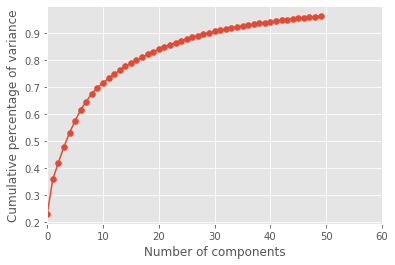

In [164]:
pca = PCA()
numcomp = 50
pca.set_params(n_components=numcomp)
pca.fit(onehothousing)
plt.scatter(range(numcomp), np.cumsum(pca.explained_variance_ratio_))
plt.plot(range(numcomp), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative percentage of variance')
plt.xlim(0, 60)
plt.show()

In [165]:
# The first 10 components explain 70% of the variance, the first 20 explains ~83% and the
# first 30 components explain ~90% of the variance. In the scree plot, there is 
# no clear evidence of an elbow to indicate a definitive number of components that explain most of the variance.

# Feature Selection
1. Use mutual_info_regression to identify important and non-important features
2. Pay close attention to categorical (discrete) features
3. Keep data standardised

In [166]:
# Don't need to use standardised features for mutual information, recreate one-hot encoding on original features
features = housing.drop(['Id', 'SalePrice', 'Pricepersqft', 'GrLivArea'], axis=1)
summarydf = summarise_data(features, 'LotArea')
mask = summarydf.VariableType == 'categorical'
orig_categorical_vars = list(summarydf.loc[mask, 'Predictor'])
mask = summarydf.VariableType == 'numerical'
numerical_vars = list(summarydf.loc[mask, 'Predictor'])
onehothousing = pd.get_dummies(features, columns=orig_categorical_vars, prefix=orig_categorical_vars, drop_first=True)
categoricalvars = onehothousing.drop(numerical_vars,axis=1).columns
discrete_indices = np.array([onehothousing.columns.get_loc(c) for c in categoricalvars])
mutual_scores = mutual_info_regression(onehothousing, target, discrete_features=discrete_indices)
impvars = pd.Series(mutual_scores, index=onehothousing.iloc[:,:].columns).sort_values(ascending=False)
impvars.head(30)

HouseAge                 0.284046
TotalBsmtSF              0.241472
RemodAge                 0.179614
OverallQual              0.160513
2ndFlrSF                 0.157486
AllBath                  0.142860
GarageCars               0.116141
ExterQual_TA             0.106685
BedroomAbvGr             0.103661
OverallCond              0.085789
KitchenQual_TA           0.080618
MSSubClass_B2            0.077124
BsmtUnfSF                0.071928
LotArea                  0.067381
GarageFinish_Unf         0.063079
SaleCondition_Partial    0.062180
ExterQual_Gd             0.062010
OtherRmsAbvGrd           0.061237
KitchenQual_Gd           0.060303
KitchenAbvGr             0.056735
Neighborhood_NridgHt     0.056496
MasVnrType_Stone         0.055617
BsmtQual_TA              0.054804
GarageType_Detchd        0.048033
PavedDrive_Y             0.045349
FireplaceQu_N            0.044797
MSSubClass_A4            0.042211
Neighborhood_CollgCr     0.039948
MSSubClass_C1            0.039699
MasVnrType_Non

In [167]:
impvars[impvars==0]

Season_Summer           0.0
Season_Winter           0.0
Shed_Y                  0.0
Season_Spring           0.0
Condition1_RR           0.0
Neighborhood_Crawfor    0.0
MSSubClass_A3           0.0
ScreenPorch_0to075      0.0
dtype: float64

**Feature selection using mutual information** has the advantage of applying to both regression and classification problems. However, it is limited in the following scenarios:
1. Low sample size (<1000), computation may break down
2. High dimensionality and spars relationships between features and target variable
3. Low sample size **and** high dimensionality. Typically stability selection using a Lasso learner works well

## Train-test split using 70/30
1. Keep 70% of data for training
2. Hold-out 30% for out-of-sample testing

In [168]:
# Store lists of names of numerical and categorical features
X_train, X_test, y_train, y_test = train_test_split(onehothousing, target, test_size=0.3, random_state=28)

## Applying machine learning models
1. Use 5-fold cross-validation and grid-search to optimise across different models
2. Use default score which is fine for supervised learning regression models that predict continuous variable

In [169]:
def test_ML(models, X_train, y_train, X_test, y_test, iterations = 1):
    """
    Function to test performances of ML algorithms given dictionary of models and dataframe data
    """
    results = {}
    for i in models:
        err_train = []
        err_test = []
        for j in range(iterations):
            err_test.append(1-metrics.r2_score(y_test, models[i].fit(X_train, y_train).predict(X_test)))
            err_train.append(1-metrics.r2_score(y_train, models[i].fit(X_train, y_train).predict(X_train)))
        results[i] = [np.mean(err_train), np.mean(err_test)]
    resultsdf = pd.DataFrame(results).T
    resultsdf.columns = ['Train Error', 'Test Error']
    return resultsdf

In [170]:
# Run basic models without CV and gridsearch
basic_models = {'OLS': LinearRegression(),
         'Lasso': Lasso(),
         'Ridge': Ridge(),}
test_ML(basic_models, X_train, y_train, X_test, y_test)

Train Error  Test Error
OLS       0.190121    0.214361
Lasso     0.329619    0.314434
Ridge     0.191776    0.200735

In [171]:
# Default parameter for Lasso is not great so run grid search and tune hyperparameter for Lasso and Ridge using 
# Grid Search and stratified K-fold Cross-Validation with K=5
lasso_params = {'alpha':np.arange(0,0.5,0.005)}
ridge_params = {'alpha':np.arange(4,5,0.05)}

gs_models = {'OLS': LinearRegression(),
           'Lasso': ms.GridSearchCV(Lasso(random_state=28), param_grid=lasso_params, cv=5, n_jobs=-1, return_train_score=True)\
             .fit(X_train, y_train).best_estimator_,
           'Ridge': ms.GridSearchCV(Ridge(random_state=28), param_grid=ridge_params, cv=5, n_jobs=-1, return_train_score=True)\
             .fit(X_train, y_train).best_estimator_,}
test_ML(gs_models, X_train, y_train, X_test, y_test)

Train Error  Test Error
OLS       0.190121    0.214361
Lasso     0.199871    0.193473
Ridge     0.196692    0.193438

In [172]:
#gs_models['Lasso'].get_params()
#dir(gs_models['Lasso'])

In [173]:
def residual_plots(models, model_name):
    """
    Function to plot the actual vs predicted values as well as residual plots for training and test data
    for a given model_name in models
    """
    train_errs = y_train - models[model_name].predict(X_train)
    test_errs = y_test - models[model_name].predict(X_test)
    fig, ax = plt.subplots(figsize=(14, 12), ncols=2, nrows=3, sharex=False, sharey=False)
    sns.scatterplot(x=y_train, y=models[model_name].predict(X_train), ax=ax[0,0])
    sns.scatterplot(x=y_test, y=models[model_name].predict(X_test), ax=ax[0,1])
    sns.distplot(train_errs, ax=ax[1,0])
    sns.distplot(test_errs, ax=ax[1,1])
    stats.probplot(train_errs, plot=ax[2,0])
    stats.probplot(train_errs, plot=ax[2,1])
    ax[2,0].set(title='')
    ax[2,1].set(title='')
    ax[0,0].set(title=model_name+': Test data')
    ax[0,1].set(title=model_name+': Train data')

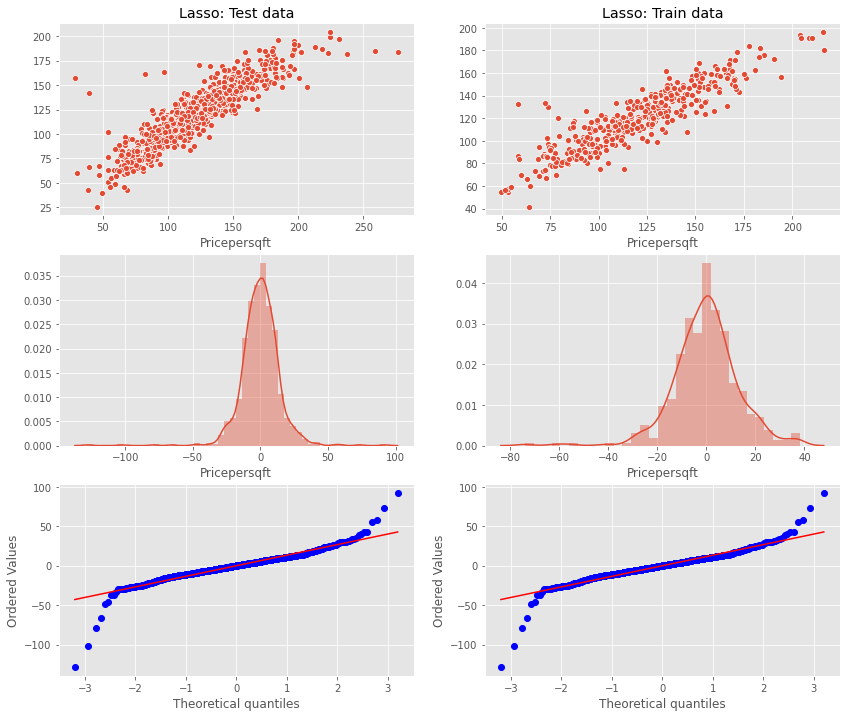

In [174]:
# Check Lasso plots
residual_plots(gs_models, 'Lasso')

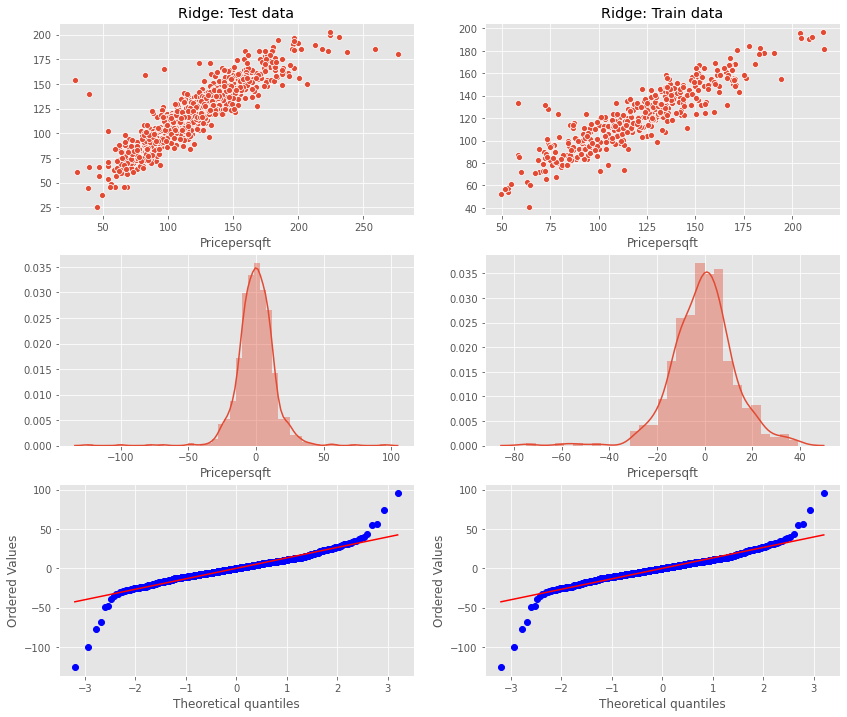

In [175]:
# Check Ridge plots
residual_plots(gs_models, 'Ridge')

In [176]:
# What does Lasso do with features at optimal lambda/alpha parameter?
sel_ = SelectFromModel(gs_models['Lasso'])
sel_.fit(X_train, y_train)
selected_feat = X_train.columns[(sel_.get_support())]
print('Total features: {}'.format((X_train.shape[1])))
print('Selected features: {}'.format(len(selected_feat)))
print('Features with coefficients shrank to zero: {}'.format(np.sum(sel_.estimator_.coef_ == 0)))

Total features: 102
Selected features: 75
Features with coefficients shrank to zero: 27


In [177]:
# What features did Lasso select?
selected_feat

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtUnfSF', 'TotalBsmtSF',
       'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars',
       'OtherRmsAbvGrd', 'HouseAge', 'RemodAge', 'AllBath', 'MSSubClass_A2',
       'MSSubClass_A4', 'MSSubClass_B1', 'MSSubClass_B2', 'MSSubClass_C1',
       'MSSubClass_C3', 'MSSubClass_E1', 'MSSubClass_E2', 'MSSubClass_F1',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_IDOTRR',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker',
       'Condition1_Norm', 'Condition1_Pos', 'MasVnrType_Stone', 'ExterQual_Gd',
       'ExterQual_TA', 'BsmtQual_TA', 'HeatingQC_Gd', 'HeatingQC_TA',
       'Kitc

In [178]:
# What features did Lasso remove?
removed_feats = X_train.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

Index(['2ndFlrSF', 'MSSubClass_A3', 'MSSubClass_C2', 'MSSubClass_D1',
       'MSSubClass_E3', 'MSSubClass_F2', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_Gilbert', 'Neighborhood_MeadowV',
       'Neighborhood_NPkVill', 'Neighborhood_SWISU', 'Condition1_Feedr',
       'Condition1_RR', 'MasVnrType_BrkFace', 'MasVnrType_None',
       'ExterCond_Gd', 'ExterCond_TA', 'BsmtQual_N', 'Functional_Mod',
       'FireplaceQu_Gd', 'GarageType_Other', 'GarageCond_TA', 'PavedDrive_P',
       'ScreenPorch_0to075', 'Shed_Y', 'SaleCondition_Partial'],
      dtype='object')

## Use Ensembling techniques and tree-based models to improve performance
Linear models have been optimised i.t.o bias-variance trade-off to produce stable models. However performance is not great with 
error rates around 20% of price per sq ft of house.

In [224]:
# Use RandomForest, SVR models
# Grid Search and stratified K-fold Cross-Validation with K=5
lasso_params = {'alpha':np.arange(0,0.5,0.005)}
ridge_params = {'alpha':np.arange(4,5,0.05)}
forest_params = {'max_depth':range(40, 50), 'n_estimators':range(80, 110, 10), 'min_samples_leaf':[1,2], \
                'min_samples_split':[2,3]}
gbm_params = {'learning_rate':[0.01, 0.02], 'n_estimators':[80,90], 'max_depth':[2,3], max_features:[2,3],\
              'min_impurity_decrease':[0.01]}

gs_models = {'OLS': LinearRegression(),
             'Lasso': ms.GridSearchCV(Lasso(random_state=28), param_grid=lasso_params, cv=5, n_jobs=-1, return_train_score=True)\
             .fit(X_train, y_train).best_estimator_,
             'Ridge': ms.GridSearchCV(Ridge(random_state=28), param_grid=ridge_params, cv=5, n_jobs=-1, return_train_score=True)\
             .fit(X_train, y_train).best_estimator_,
             'RF': ms.GridSearchCV(ensemble.RandomForestRegressor(random_state=28, warm_start=True, max_features='sqrt')\
                                 ,param_grid=forest_params, cv=5, n_jobs=-1, return_train_score=True).fit(X_train, y_train)\
             .best_estimator_,
             'GBM': ms.GridSearchCV(ensemble.GradientBoostingRegressor(random_state=28, warm_start=True, verbose=1, \
                                                                       subsample=0.7, loss='ls', max_features='sqrt'),\
                                    param_grid=gbm_params, cv=5, n_jobs=-1, return_train_score=True).\
             fit(X_train, y_train).best_estimator_,}
%time test_ML(gs_models, X_train, y_train, X_test, y_test)

SyntaxError: closing parenthesis ')' does not match opening parenthesis '{' on line 7 (<ipython-input-224-397823ed3572>, line 8)

In [219]:
gs_models['GBM'].get_params()

{'bootstrap': True,
 'ccp_alpha': 1,
 'criterion': 'mse',
 'max_depth': 40,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 90,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 28,
 'verbose': 0,
 'warm_start': True}

In [ ]:
# linear = LinearRegression(normalize=False)
# ridge = Ridge(normalize=False)
# lasso = Lasso(normalize=False)

# modelList = [linear, ridge, lasso]
# modelSeries = pd.Series(modelList, index=['MLR', 'Ridge', 'Lasso'])

# # fit all the models to the training data
# modelSeries.apply(lambda t:t.fit(X_train, y_train))

# ans = modelSeries.apply(lambda t:pd.Series(get_error(X_train, y_train, X_test, y_test, t, False)))
# ans.columns = ['train score', 'test score']
# ans

In [ ]:
# lasso  = Lasso()
# alphas = np.linspace(0.1,2.1,20)
# lasso.set_params(normalize=False)
# coefs_lasso  = []

# for alpha in alphas:
#         lasso.set_params(alpha=alpha)
#         lasso.fit(onehothousing, target)  
#         coefs_lasso.append(lasso.coef_)

# coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas, columns = onehothousing.columns)  
# coefs_lasso.head()

# ##############################################################################################

# for name in coefs_lasso.columns:
#     plt.plot(coefs_lasso.index, coefs_lasso[name], label=name)
# plt.xlabel(r'hyperparameter $\lambda$')
# plt.ylabel(r'slope values')
# plt.legend(loc=1)   